In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
import numpy as np

import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Select bus trip data and merge with weather information

In [ ]:
#function to open temperature dataset
def temp(path_tem =r'/content/drive/My Drive/Colab Notebooks/Thesis/temperature' ):
  #path_tem =r'/content/drive/My Drive/Colab Notebooks/Thesis/temperature' # use your path
  allFiles = glob.glob(path_tem + "/*.txt")

  list_ = []
  i=0


  for file_ in allFiles:
      df = pd.read_csv(file_, sep=';',skiprows=1,
                        names = ['STATIONS_ID','MESS_DATUM','QN_8','R1','Precipitation','WRTR','eor'
                                ])
      #df['date'] = date_list[i]
      #df['line'] = line_list[i]

      #df = restructure_data(df)
      list_.append(df)
      i+=1

  Ta_list = pd.concat(list_, axis = 0, ignore_index = True)
  Ta_list = Ta_list.drop(['STATIONS_ID','QN_8','WRTR', 'eor'], axis=1)
  Ta_list['date_time'] = pd.to_datetime(Ta_list.MESS_DATUM, format='%Y%m%d%H', errors='ignore')
  Ta_list= Ta_list.groupby(['date_time'], as_index=False).mean()
  Ta_list['Precipitation'] = np.ceil(Ta_list.Precipitation)
  return Ta_list

In [ ]:
file_name = 112 # or 4

if file_name == 112: #the whole year 2019
  path = "/content/drive/My Drive/Colab Notebooks/Thesis/IST_filter_Line28.csv"
  df = pd.read_csv(path)
  df = df.drop(['index'], axis=1)
  df['Ab_ZT_PLAN'] = df['Ab_ZT_PLAN'].astype('datetime64[ns]')
  df['Ank_ZT_PLAN'] = df['Ank_ZT_PLAN'].astype('datetime64[ns]')
  df['TagMean'] = df['Ab_ZT_PLAN']+(df['Ank_ZT_PLAN']-df['Ab_ZT_PLAN'])/2
  df['TagRound'] = df['TagMean'].dt.round("H")
  df['TagRound'] = df['TagRound'].astype('datetime64[ns]')

  Ta_list = temp()

  dft_join = pd.merge(df, Ta_list, how='left', left_on=['TagRound'], right_on = ['date_time'])
  dft_join = dft_join.drop('date_time', axis = 1)
  
  df_filter = dft_join.copy()
elif file_name == 4: #only April
  path = "/content/drive/My Drive/Colab Notebooks/Thesis/IST_ECR_filter_0419.csv"
  df_filter = pd.read_csv(path)

# **Having a quick look at the data**

In [ ]:
#df_filter = df_filter.drop(['Unnamed: 0','index'], axis=1)
df_filter[-50:]

,Unnamed: 0,Datum,UML,Wagen,Ab_ZT_PLAN,Linie,Haltestelle,Fahrplanlage_IST,v_PLAN,v_IST_S2S1,v_netto_S2S1,FFVP_GESCHWINDIGKEIT,v_IST,Ank_ZT_PLAN,S_Station,E_Station,NHaltestelle,Node A to Node B,date,Ab_ZT_ACTUAL,Ank_ZT_ACTUAL,Driving_time_s,Distance_m,Driving_time_s_p,Distance_m_p,TagMean,TagRound,MESS_DATUM,R1,Precipitation
673691,673691,24.10.2019,77200.0,1612.0,2019-10-24 15:38:00,28.0,AK Barmbek,1.6,24.7,32.2,25.4,0,16.3,2019-10-24 15:39:00,Lufthansa-Basis (Haupteingang),Wandsbeker Allee,Hartzloh,AK Barmbek|Hartzloh,24.10.2019,2019-10-24 15:39:36,2019-10-24 15:41:06,90.0,407.500000,60.0,411.666667,2019-10-24 15:38:30,2019-10-24 16:00:00,2.019102e+09,0.0,0.0
673692,673692,24.10.2019,77200.0,1612.0,2019-10-24 15:39:00,28.0,Hartzloh,2.1,16.7,18.0,16.2,1,15.6,2019-10-24 15:42:00,Lufthansa-Basis (Haupteingang),Wandsbeker Allee,Habichtsplatz,Hartzloh|Habichtsplatz,24.10.2019,2019-10-24 15:41:06,2019-10-24 15:44:18,192.0,832.000000,180.0,835.000000,2019-10-24 15:40:30,2019-10-24 16:00:00,2.019102e+09,0.0,0.0
673693,673693,24.10.2019,77200.0,1612.0,2019-10-24 15:42:00,28.0,Habichtsplatz,2.3,28.7,8.4,7.4,0,7.1,2019-10-24 15:43:00,Lufthansa-Basis (Haupteingang),Wandsbeker Allee,U Habichtstraße,Habichtsplatz|U Habichtstraße,24.10.2019,2019-10-24 15:44:18,2019-10-24 15:48:30,252.0,497.000000,60.0,478.333333,2019-10-24 15:42:30,2019-10-24 16:00:00,2.019102e+09,0.0,0.0
673694,673694,24.10.2019,77200.0,1612.0,2019-10-24 15:43:00,28.0,U Habichtstraße,5.5,9.9,3.4,2.8,0,3.1,2019-10-24 15:45:00,Lufthansa-Basis (Haupteingang),Wandsbeker Allee,Habichtstraße (Mitte),U Habichtstraße|Habichtstraße (Mitte),24.10.2019,2019-10-24 15:48:30,2019-10-24 15:54:54,384.0,330.666667,120.0,330.000000,2019-10-24 15:44:00,2019-10-24 16:00:00,2.019102e+09,0.0,0.0
673695,673695,24.10.2019,77200.0,1612.0,2019-10-24 15:45:00,28.0,Habichtstraße (Mitte),9.9,12.1,6.6,6.2,0,5.8,2019-10-24 15:49:00,Lufthansa-Basis (Haupteingang),Wandsbeker Allee,U Alter Teichweg,Habichtstraße (Mitte)|U Alter Teichweg,24.10.2019,2019-10-24 15:54:54,2019-10-24 16:03:12,498.0,802.333333,240.0,806.666667,2019-10-24 15:47:00,2019-10-24 16:00:00,2.019102e+09,0.0,0.0
673696,673696,24.10.2019,77200.0,1612.0,2019-10-24 15:49:00,28.0,U Alter Teichweg,14.2,20.9,6.9,5.5,0,6.3,2019-10-24 15:51:00,Lufthansa-Basis (Haupteingang),Wandsbeker Allee,U Straßburger Straße,U Alter Teichweg|U Straßburger Straße,24.10.2019,2019-10-24 16:03:12,2019-10-24 16:10:12,420.0,735.000000,120.0,696.666667,2019-10-24 15:50:00,2019-10-24 16:00:00,2.019102e+09,0.0,0.0
673697,673697,24.10.2019,77200.0,1612.0,2019-10-24 15:51:00,28.0,U Straßburger Straße,19.2,18.1,-,-,0,12.8,2019-10-24 15:52:00,Lufthansa-Basis (Haupteingang),Wandsbeker Allee,Wandsbeker Allee,U Straßburger Straße|Wandsbeker Allee,24.10.2019,2019-10-24 16:10:12,2019-10-24 16:11:06,54.0,192.000000,60.0,301.666667,2019-10-24 15:51:30,2019-10-24 16:00:00,2.019102e+09,0.0,0.0
673698,673698,24.10.2019,77200.0,1612.0,2019-10-24 15:52:00,28.0,Wandsbeker Allee,19.1,11.6,-,-,29,16.5,2019-10-24 16:15:00,Lufthansa-Basis (Haupteingang),Wandsbeker Allee,Source,Wandsbeker Allee|Source,24.10.2019,2019-10-24 16:11:06,2019-10-24 16:15:42,276.0,1265.000000,1380.0,4446.666667,2019-10-24 16:03:30,2019-10-24 16:00:00,2.019102e+09,0.0,0.0
673699,673699,24.10.2019,77200.0,1612.0,2019-10-24 16:15:00,28.0,U Wandsbek Markt,0.7,19.0,5.5,5.1,0,5.3,2019-10-24 16:18:00,U Wandsbek Markt,S Rübenkamp,Wandsbeker Allee,U Wandsbek Markt|Wandsbeker Allee,24.10.2019,2019-10-24 16:15:42,2019-10-24 16:26:30,648.0,954.000000,180.0,950.000000,2019-10-24 16:16:30,2019-10-24 16:00:00,2.019102e+09,0.0,0.0
673700,673700,24.10.2019,77200.0,1612.0,2019-10-24 16:18:00,28.0,Wandsbeker Allee,8.5,10.9,7.2,5.9,0,6.0,2019-10-24 16:20:00,U Wandsbek Markt,S Rübenkamp,U Straßburger Straße,Wandsbeker Allee|U Straßburger Straße,24.10.2019,2019-10-24 16:26:30,2019-10-24 16:30:18,228.0,380.000000,120.0,363.333333,2019-10-24 16:19:00,2019-10-24 16:00:00,2.019102e+09,0.0,0.0


In [ ]:
# Checking how many unique lines there are in the dataframe
len(df_filter.Linie.unique())

1

In [ ]:
df_filter.dtypes

Unnamed: 0                       int64
Datum                           object
UML                            float64
Wagen                          float64
Ab_ZT_PLAN              datetime64[ns]
Linie                          float64
Haltestelle                     object
Fahrplanlage_IST               float64
v_PLAN                         float64
v_IST_S2S1                      object
v_netto_S2S1                    object
FFVP_GESCHWINDIGKEIT            object
v_IST                           object
Ank_ZT_PLAN             datetime64[ns]
S_Station                       object
E_Station                       object
NHaltestelle                    object
Node A to Node B                object
date                            object
Ab_ZT_ACTUAL                    object
Ank_ZT_ACTUAL                   object
Driving_time_s                 float64
Distance_m                     float64
Driving_time_s_p               float64
Distance_m_p                   float64
TagMean                 d

In [ ]:
df_filter['date']= pd.to_datetime(df_filter.date, format='%d.%m.%Y', errors='ignore') #change date format
df_filter

,Unnamed: 0,Datum,UML,Wagen,Ab_ZT_PLAN,Linie,Haltestelle,Fahrplanlage_IST,v_PLAN,v_IST_S2S1,v_netto_S2S1,FFVP_GESCHWINDIGKEIT,v_IST,Ank_ZT_PLAN,S_Station,E_Station,NHaltestelle,Node A to Node B,date,Ab_ZT_ACTUAL,Ank_ZT_ACTUAL,Driving_time_s,Distance_m,Driving_time_s_p,Distance_m_p,TagMean,TagRound,MESS_DATUM,R1,Precipitation
0,0,01.05.2019,88008.0,1772.0,2019-05-01 09:41:00,28.0,U Wandsbek Markt,0.5,18.9,12.8,11.9,15,12.2,2019-05-01 09:44:00,U Wandsbek Markt,S Rübenkamp,Wandsbeker Allee,U Wandsbek Markt|Wandsbeker Allee,2019-05-01,2019-05-01 09:41:30,2019-05-01 09:46:18,288.0,976.000000,180.0,945.000000,2019-05-01 09:42:30,2019-05-01 10:00:00,2.019050e+09,0.0,1.0
1,1,01.05.2019,88008.0,1772.0,2019-05-01 09:44:00,28.0,Wandsbeker Allee,2.3,10.7,17.1,17.1,0,12.6,2019-05-01 09:46:00,U Wandsbek Markt,S Rübenkamp,U Straßburger Straße,Wandsbeker Allee|U Straßburger Straße,2019-05-01,2019-05-01 09:46:18,2019-05-01 09:48:00,102.0,357.000000,120.0,356.666667,2019-05-01 09:45:00,2019-05-01 10:00:00,2.019050e+09,0.0,1.0
2,2,01.05.2019,88008.0,1772.0,2019-05-01 09:46:00,28.0,U Straßburger Straße,2.0,31.4,33.7,25.6,0,14.1,2019-05-01 09:47:00,U Wandsbek Markt,S Rübenkamp,U Alter Teichweg,U Straßburger Straße|U Alter Teichweg,2019-05-01,2019-05-01 09:48:00,2019-05-01 09:50:18,138.0,540.500000,60.0,523.333333,2019-05-01 09:46:30,2019-05-01 10:00:00,2.019050e+09,0.0,1.0
3,3,01.05.2019,88008.0,1772.0,2019-05-01 09:47:00,28.0,U Alter Teichweg,3.3,28.6,32.7,29.7,0,27.0,2019-05-01 09:49:00,U Wandsbek Markt,S Rübenkamp,Habichtstraße (Mitte),U Alter Teichweg|Habichtstraße (Mitte),2019-05-01,2019-05-01 09:50:18,2019-05-01 09:52:12,114.0,855.000000,120.0,953.333333,2019-05-01 09:48:00,2019-05-01 10:00:00,2.019050e+09,0.0,1.0
4,4,01.05.2019,88008.0,1772.0,2019-05-01 09:49:00,28.0,Habichtstraße (Mitte),3.2,11.3,24.3,9.3,40,14.2,2019-05-01 09:50:00,U Wandsbek Markt,S Rübenkamp,U Habichtstraße,Habichtstraße (Mitte)|U Habichtstraße,2019-05-01,2019-05-01 09:52:12,2019-05-01 09:53:12,60.0,236.666667,60.0,188.333333,2019-05-01 09:49:30,2019-05-01 10:00:00,2.019050e+09,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673736,673736,24.10.2019,77200.0,1612.0,2019-10-24 18:53:00,28.0,U Habichtstraße,14.7,19.8,4.7,3.8,0,4.1,2019-10-24 18:54:00,S Rübenkamp,Wandsbeker Allee,Habichtstraße (Mitte),U Habichtstraße|Habichtstraße (Mitte),2019-10-24,2019-10-24 19:07:42,2019-10-24 19:12:18,276.0,314.333333,60.0,330.000000,2019-10-24 18:53:30,2019-10-24 19:00:00,2.019102e+09,0.0,0.0
673737,673737,24.10.2019,77200.0,1612.0,2019-10-24 18:54:00,28.0,Habichtstraße (Mitte),18.3,16.1,7.4,6.9,0,6.7,2019-10-24 18:57:00,S Rübenkamp,Wandsbeker Allee,U Alter Teichweg,Habichtstraße (Mitte)|U Alter Teichweg,2019-10-24,2019-10-24 19:12:18,2019-10-24 19:19:42,444.0,826.333333,180.0,805.000000,2019-10-24 18:55:30,2019-10-24 19:00:00,2.019102e+09,0.0,0.0
673738,673738,24.10.2019,77200.0,1612.0,2019-10-24 18:57:00,28.0,U Alter Teichweg,22.7,20.9,8.6,6.8,0,6.9,2019-10-24 18:59:00,S Rübenkamp,Wandsbeker Allee,U Straßburger Straße,U Alter Teichweg|U Straßburger Straße,2019-10-24,2019-10-24 19:19:42,2019-10-24 19:25:30,348.0,667.000000,120.0,696.666667,2019-10-24 18:58:00,2019-10-24 19:00:00,2.019102e+09,0.0,0.0
673739,673739,24.10.2019,77200.0,1612.0,2019-10-24 18:59:00,28.0,U Straßburger Straße,26.5,18.1,-,-,19,11.9,2019-10-24 19:00:00,S Rübenkamp,Wandsbeker Allee,Wandsbeker Allee,U Straßburger Straße|Wandsbeker Allee,2019-10-24,2019-10-24 19:25:30,2019-10-24 19:27:00,90.0,297.500000,60.0,301.666667,2019-10-24 18:59:30,2019-10-24 19:00:00,2.019102e+09,0.0,0.0


In [ ]:
df_filter = df_filter.sort_values( ['date', 'Unnamed: 0']).reset_index(drop = True) #
df_filter[-50:]

,Unnamed: 0,Datum,UML,Wagen,Ab_ZT_PLAN,Linie,Haltestelle,Fahrplanlage_IST,v_PLAN,v_IST_S2S1,v_netto_S2S1,FFVP_GESCHWINDIGKEIT,v_IST,Ank_ZT_PLAN,S_Station,E_Station,NHaltestelle,Node A to Node B,date,Ab_ZT_ACTUAL,Ank_ZT_ACTUAL,Driving_time_s,Distance_m,Driving_time_s_p,Distance_m_p,TagMean,TagRound,MESS_DATUM,R1,Precipitation
673691,657653,23.12.2019,77118.0,1982.0,2019-12-23 07:16:00,28.0,U Habichtstraße,0.0,12.4,48.0,41.2,0,11.6,2019-12-23 07:18:00,U Wandsbek Markt,Lufthansa-Basis (Haupteingang),Habichtsplatz,U Habichtstraße|Habichtsplatz,2019-12-23,2019-12-23 07:16:00,2019-12-23 07:18:18,138.0,444.666667,120.0,413.333333,2019-12-23 07:17:00,2019-12-23 07:00:00,2.019122e+09,0.00,1.0
673692,657654,23.12.2019,77118.0,1982.0,2019-12-23 07:18:00,28.0,Habichtsplatz,0.3,9.3,15.2,12.9,0,8.0,2019-12-23 07:21:00,U Wandsbek Markt,Lufthansa-Basis (Haupteingang),Neue Wöhr,Habichtsplatz|Neue Wöhr,2019-12-23,2019-12-23 07:18:18,2019-12-23 07:20:18,120.0,266.666667,180.0,465.000000,2019-12-23 07:19:30,2019-12-23 07:00:00,2.019122e+09,0.00,1.0
673693,657655,23.12.2019,77118.0,1982.0,2019-12-23 07:21:00,28.0,Neue Wöhr,-0.7,18.7,48.8,41.2,35,10.8,2019-12-23 07:22:00,U Wandsbek Markt,Lufthansa-Basis (Haupteingang),Hartzloh,Neue Wöhr|Hartzloh,2019-12-23,2019-12-23 07:20:18,2019-12-23 07:22:00,102.0,306.000000,60.0,311.666667,2019-12-23 07:21:30,2019-12-23 07:00:00,2.019122e+09,0.00,1.0
673694,657656,23.12.2019,77118.0,1982.0,2019-12-23 07:22:00,28.0,Hartzloh,0.0,20.0,42.9,35.9,20,24.0,2019-12-23 07:23:00,U Wandsbek Markt,Lufthansa-Basis (Haupteingang),AK Barmbek,Hartzloh|AK Barmbek,2019-12-23,2019-12-23 07:22:00,2019-12-23 07:23:00,60.0,400.000000,60.0,333.333333,2019-12-23 07:22:30,2019-12-23 07:00:00,2.019122e+09,0.00,1.0
673695,657657,23.12.2019,77118.0,1982.0,2019-12-23 07:23:00,28.0,AK Barmbek,0.0,13.0,30.0,26.6,0,19.8,2019-12-23 07:25:00,U Wandsbek Markt,Lufthansa-Basis (Haupteingang),Hebebrandstraße,AK Barmbek|Hebebrandstraße,2019-12-23,2019-12-23 07:23:00,2019-12-23 07:24:24,84.0,462.000000,120.0,433.333333,2019-12-23 07:24:00,2019-12-23 07:00:00,2.019122e+09,0.00,1.0
673696,657658,23.12.2019,77118.0,1982.0,2019-12-23 07:25:00,28.0,Hebebrandstraße,-0.6,10.0,23.6,18.5,0,13.8,2019-12-23 07:27:00,U Wandsbek Markt,Lufthansa-Basis (Haupteingang),S Rübenkamp,Hebebrandstraße|S Rübenkamp,2019-12-23,2019-12-23 07:24:24,2019-12-23 07:27:06,162.0,621.000000,120.0,333.333333,2019-12-23 07:26:00,2019-12-23 07:00:00,2.019122e+09,0.00,1.0
673697,657659,23.12.2019,77118.0,1982.0,2019-12-23 07:27:00,28.0,S Rübenkamp,0.1,35.9,44.9,38.9,0,12.8,2019-12-23 07:28:00,U Wandsbek Markt,Lufthansa-Basis (Haupteingang),Kapstadtring,S Rübenkamp|Kapstadtring,2019-12-23,2019-12-23 07:27:06,2019-12-23 07:28:36,90.0,320.000000,60.0,598.333333,2019-12-23 07:27:30,2019-12-23 07:00:00,2.019122e+09,0.00,1.0
673698,657660,23.12.2019,77118.0,1982.0,2019-12-23 07:28:00,28.0,Kapstadtring,0.6,12.7,58.4,36.3,0,18.1,2019-12-23 07:29:00,U Wandsbek Markt,Lufthansa-Basis (Haupteingang),Manilabrücke,Kapstadtring|Manilabrücke,2019-12-23,2019-12-23 07:28:36,2019-12-23 07:29:12,36.0,181.000000,60.0,211.666667,2019-12-23 07:28:30,2019-12-23 07:00:00,2.019122e+09,0.00,1.0
673699,657661,23.12.2019,77118.0,1982.0,2019-12-23 07:29:00,28.0,Manilabrücke,0.2,26.9,43.7,38.1,0,30.5,2019-12-23 07:30:00,U Wandsbek Markt,Lufthansa-Basis (Haupteingang),Sydneystraße,Manilabrücke|Sydneystraße,2019-12-23,2019-12-23 07:29:12,2019-12-23 07:30:00,48.0,406.666667,60.0,448.333333,2019-12-23 07:29:30,2019-12-23 07:00:00,2.019122e+09,0.00,1.0
673700,657662,23.12.2019,77118.0,1982.0,2019-12-23 07:30:00,28.0,Sydneystraße,0.0,15.8,15.4,13.7,29,13.2,2019-12-23 07:32:00,U Wandsbek Markt,Lufthansa-Basis (Haupteingang),U Alsterdorf,Sydneystraße|U Alsterdorf,2019-12-23,2019-12-23 07:30:00,2019-12-23 07:32:42,162.0,594.000000,120.0,526.666667,2019-12-23 07:31:00,2019-12-23 08:00:00,2.019122e+09,0.05,1.0


# **Select only relevent features**

Features are selected based on Chen et al.(2004) paper.

## Journey 101 ***U Wandsbek Markt to S Rübenkamp***

In [ ]:
df_selected = df_filter.loc[df_filter['S_Station'] == 'U Wandsbek Markt'].reset_index()
df_selected = df_selected.loc[df_selected['E_Station'] == 'S Rübenkamp'].reset_index()
df_selected = df_selected[['Ab_ZT_PLAN', 'TagRound', 'UML', 'Linie', 'Node A to Node B', 'Precipitation', 'Driving_time_s_p', 'Driving_time_s']]
#df_selected = df_selected.loc[df_selected['UML'] == 77082]
df_selected = df_selected.loc[df_selected['Linie']  == 28].reset_index()
df_selected = df_selected.loc[(df_selected['Driving_time_s']  <= 1000) & (df_selected['Driving_time_s']  >= 0)].reset_index()
df_selected = df_selected.drop(['Linie', 'TagRound', 'index', 'UML', 'level_0'], axis=1)

In [ ]:
df_selected= df_selected.rename({'Ab_ZT_PLAN': 'Time'}, axis=1)

In [ ]:
df_selected

,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s
0,2019-01-01 14:58:00,U Wandsbek Markt|Wandsbeker Allee,1.0,180.0,228.0
1,2019-01-01 15:01:00,Wandsbeker Allee|U Straßburger Straße,1.0,120.0,66.0
2,2019-01-01 15:03:00,U Straßburger Straße|U Alter Teichweg,1.0,60.0,66.0
3,2019-01-01 15:04:00,U Alter Teichweg|Habichtstraße (Mitte),1.0,120.0,102.0
4,2019-01-01 15:06:00,Habichtstraße (Mitte)|U Habichtstraße,1.0,60.0,108.0
...,...,...,...,...,...
136831,2019-12-23 08:58:00,Habichtsplatz|Neue Wöhr,1.0,180.0,144.0
136832,2019-12-23 09:01:00,Neue Wöhr|Hartzloh,1.0,60.0,66.0
136833,2019-12-23 09:02:00,Hartzloh|AK Barmbek,1.0,60.0,60.0
136834,2019-12-23 09:03:00,AK Barmbek|Hebebrandstraße,1.0,120.0,132.0


In [ ]:
import math
df_selected['dayofweek'] = df_selected['Time'].dt.dayofweek
df_selected['hour'] = (df_selected['Time'].dt.hour+1)
df_selected['day'] = df_selected['Time'].dt.day
df_selected['month'] = df_selected['Time'].dt.month
df_selected['timeofday'] = [0 for number in df_selected['Time']]
df_selected

,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,hour,day,month,timeofday
0,2019-01-01 14:58:00,U Wandsbek Markt|Wandsbeker Allee,1.0,180.0,228.0,1,15,1,1,0
1,2019-01-01 15:01:00,Wandsbeker Allee|U Straßburger Straße,1.0,120.0,66.0,1,16,1,1,0
2,2019-01-01 15:03:00,U Straßburger Straße|U Alter Teichweg,1.0,60.0,66.0,1,16,1,1,0
3,2019-01-01 15:04:00,U Alter Teichweg|Habichtstraße (Mitte),1.0,120.0,102.0,1,16,1,1,0
4,2019-01-01 15:06:00,Habichtstraße (Mitte)|U Habichtstraße,1.0,60.0,108.0,1,16,1,1,0
...,...,...,...,...,...,...,...,...,...,...
136831,2019-12-23 08:58:00,Habichtsplatz|Neue Wöhr,1.0,180.0,144.0,0,9,23,12,0
136832,2019-12-23 09:01:00,Neue Wöhr|Hartzloh,1.0,60.0,66.0,0,10,23,12,0
136833,2019-12-23 09:02:00,Hartzloh|AK Barmbek,1.0,60.0,60.0,0,10,23,12,0
136834,2019-12-23 09:03:00,AK Barmbek|Hebebrandstraße,1.0,120.0,132.0,0,10,23,12,0


Filter Holidays out

In [ ]:
#df_selected = df_selected[~df_selected['day'].isin([19,22])].reset_index() # for April dataset
df_selected = df_selected.loc[~(((df_selected['day'] == 1) & (df_selected['month'] ==  1)) # for the whole year dataset
                  |((df_selected['day'] == 19) & (df_selected['month'] == 4))
                  |((df_selected['day'] == 21) & (df_selected['month'] == 4))
                  |((df_selected['day'] == 22) & (df_selected['month'] == 4))
                  |((df_selected['day'] == 1) & (df_selected['month'] == 5))
                  |((df_selected['day'] == 30) & (df_selected['month'] == 5))
                  |((df_selected['day'] == 10) & (df_selected['month'] == 6))
                  |((df_selected['day'] == 3) & (df_selected['month'] == 10))
                  |((df_selected['day'] == 31) & (df_selected['month'] == 10))
                  |((df_selected['day'] == 25) & (df_selected['month'] == 12))
                  |((df_selected['day'] == 26) & (df_selected['month'] == 12))
                  ),:].reset_index()
df_selected[:50]

,index,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,hour,day,month,timeofday
0,143,2019-01-02 09:47:00,U Wandsbek Markt|Wandsbeker Allee,0.0,180.0,204.0,2,10,2,1,0
1,144,2019-01-02 09:50:00,Wandsbeker Allee|U Straßburger Straße,0.0,120.0,108.0,2,10,2,1,0
2,145,2019-01-02 09:52:00,U Straßburger Straße|U Alter Teichweg,0.0,120.0,96.0,2,10,2,1,0
3,146,2019-01-02 09:54:00,U Alter Teichweg|Habichtstraße (Mitte),0.0,180.0,168.0,2,10,2,1,0
4,147,2019-01-02 09:57:00,Habichtstraße (Mitte)|U Habichtstraße,0.0,60.0,54.0,2,10,2,1,0
5,148,2019-01-02 09:58:00,U Habichtstraße|Habichtsplatz,0.0,120.0,114.0,2,10,2,1,0
6,149,2019-01-02 10:00:00,Habichtsplatz|Neue Wöhr,0.0,120.0,174.0,2,11,2,1,0
7,150,2019-01-02 10:02:00,Neue Wöhr|Hartzloh,0.0,60.0,60.0,2,11,2,1,0
8,151,2019-01-02 10:03:00,Hartzloh|AK Barmbek,0.0,60.0,60.0,2,11,2,1,0
9,152,2019-01-02 10:04:00,AK Barmbek|Hebebrandstraße,0.0,120.0,126.0,2,11,2,1,0


Find high driving time period on day

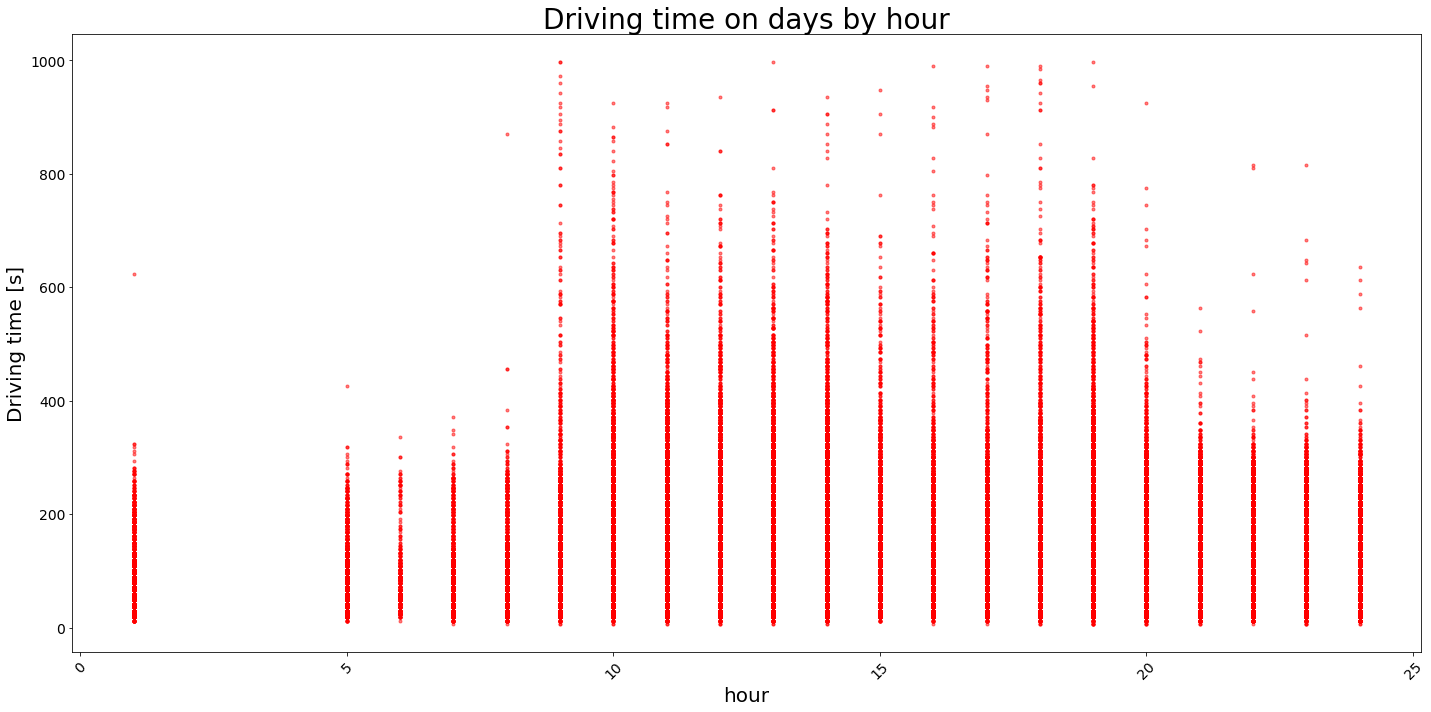

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(df_selected['hour'], df_selected['Driving_time_s'], '.', color='red', label='Original data', alpha=0.5)
plt.xlabel('hour', fontsize=20)
plt.ylabel(r'Driving time [s]', fontsize=20)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Driving time on days by hour', fontsize=28)

plt.tight_layout()

In [ ]:
# manual clustering the hour
for i in range(len(df_selected)):
  #print('1')
  if df_selected['hour'][i]<9:
    df_selected['timeofday'][i] = 0
  elif df_selected['hour'][i]<11:
    df_selected['timeofday'][i] = 1
  elif df_selected['hour'][i] < 16:
    df_selected['timeofday'][i] = 2
  elif df_selected['hour'][i] <20:
    df_selected['timeofday'][i] = 3
  else:
    df_selected['timeofday'][i] = 4

df_selected


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launc

,index,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,hour,day,month,timeofday
0,143,2019-01-02 09:47:00,U Wandsbek Markt|Wandsbeker Allee,0.0,180.0,204.0,2,10,2,1,1
1,144,2019-01-02 09:50:00,Wandsbeker Allee|U Straßburger Straße,0.0,120.0,108.0,2,10,2,1,1
2,145,2019-01-02 09:52:00,U Straßburger Straße|U Alter Teichweg,0.0,120.0,96.0,2,10,2,1,1
3,146,2019-01-02 09:54:00,U Alter Teichweg|Habichtstraße (Mitte),0.0,180.0,168.0,2,10,2,1,1
4,147,2019-01-02 09:57:00,Habichtstraße (Mitte)|U Habichtstraße,0.0,60.0,54.0,2,10,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
133269,136831,2019-12-23 08:58:00,Habichtsplatz|Neue Wöhr,1.0,180.0,144.0,0,9,23,12,1
133270,136832,2019-12-23 09:01:00,Neue Wöhr|Hartzloh,1.0,60.0,66.0,0,10,23,12,1
133271,136833,2019-12-23 09:02:00,Hartzloh|AK Barmbek,1.0,60.0,60.0,0,10,23,12,1
133272,136834,2019-12-23 09:03:00,AK Barmbek|Hebebrandstraße,1.0,120.0,132.0,0,10,23,12,1


In [ ]:
df_selected = df_selected.drop(['index','day','hour'], axis=1)
df_selected

,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,month,timeofday
0,2019-01-02 09:47:00,U Wandsbek Markt|Wandsbeker Allee,0.0,180.0,204.0,2,1,1
1,2019-01-02 09:50:00,Wandsbeker Allee|U Straßburger Straße,0.0,120.0,108.0,2,1,1
2,2019-01-02 09:52:00,U Straßburger Straße|U Alter Teichweg,0.0,120.0,96.0,2,1,1
3,2019-01-02 09:54:00,U Alter Teichweg|Habichtstraße (Mitte),0.0,180.0,168.0,2,1,1
4,2019-01-02 09:57:00,Habichtstraße (Mitte)|U Habichtstraße,0.0,60.0,54.0,2,1,1
...,...,...,...,...,...,...,...,...
133269,2019-12-23 08:58:00,Habichtsplatz|Neue Wöhr,1.0,180.0,144.0,0,12,1
133270,2019-12-23 09:01:00,Neue Wöhr|Hartzloh,1.0,60.0,66.0,0,12,1
133271,2019-12-23 09:02:00,Hartzloh|AK Barmbek,1.0,60.0,60.0,0,12,1
133272,2019-12-23 09:03:00,AK Barmbek|Hebebrandstraße,1.0,120.0,132.0,0,12,1


In [ ]:
len(df_selected['Node A to Node B'].unique())

29

In [ ]:
df_selected.describe()

,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,month,timeofday
count,133274.000000,133274.000000,133274.000000,133274.000000,133274.000000,133274.000000
mean,-0.260103,100.369014,107.076729,3.573608,6.398165,2.623332
std,16.747740,57.641203,90.010200,1.997125,3.273029,1.237864
min,-499.000000,60.000000,6.000000,0.000000,1.000000,0.000000
25%,0.000000,60.000000,54.000000,2.000000,4.000000,2.000000
50%,0.000000,120.000000,78.000000,4.000000,6.000000,3.000000
75%,1.000000,120.000000,126.000000,5.000000,9.000000,4.000000
max,1.000000,3480.000000,996.000000,6.000000,12.000000,4.000000


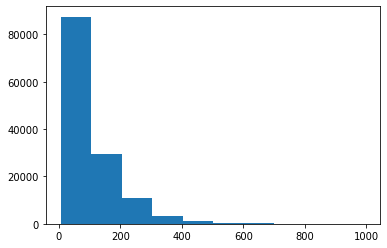

In [ ]:
plt.hist(df_selected['Driving_time_s'])
plt.show()

In [ ]:
data = df_selected.copy()

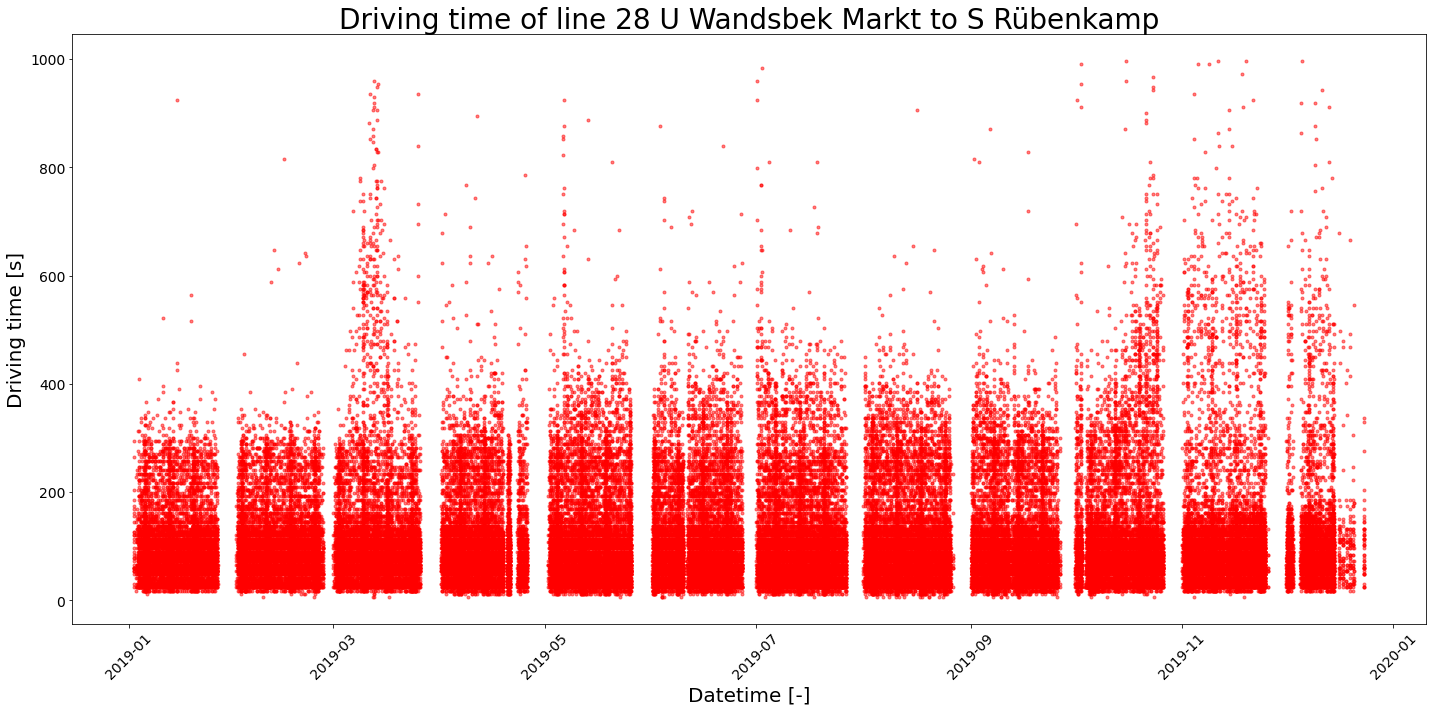

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(data['Time'], data['Driving_time_s'], '.', color='red', label='Original data', alpha=0.5)
plt.xlabel('Datetime [-]', fontsize=20)
plt.ylabel(r'Driving time [s]', fontsize=20)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Driving time of line 28 U Wandsbek Markt to S Rübenkamp', fontsize=28)

plt.tight_layout()

#plt.savefig('figures/available data.png', dpi=1200)

From this plot it is clear that the driving time is really fluctuate. The highest one is almost 4000 second.
There are periods of missing data visible on every weekend.

**Add two new columns for accumulate values**

In [ ]:
data.loc[data.Precipitation == -499 ]=0
data = data.loc[data['Node A to Node B'].isin(['U Wandsbek Markt|Wandsbeker Allee',
       'Wandsbeker Allee|U Straßburger Straße',
       'U Straßburger Straße|U Alter Teichweg',
       'U Alter Teichweg|Habichtstraße (Mitte)',
       'Habichtstraße (Mitte)|U Habichtstraße',
       'U Habichtstraße|Habichtsplatz', 'Habichtsplatz|Neue Wöhr',
       'Neue Wöhr|Hartzloh', 'Hartzloh|AK Barmbek',
       'AK Barmbek|Hebebrandstraße', 'Hebebrandstraße|S Rübenkamp'])]

In [ ]:
data =data.reset_index(drop=True)

In [ ]:
route_unique = (data['Node A to Node B'].unique())
route_unique

array(['U Wandsbek Markt|Wandsbeker Allee',
       'Wandsbeker Allee|U Straßburger Straße',
       'U Straßburger Straße|U Alter Teichweg',
       'U Alter Teichweg|Habichtstraße (Mitte)',
       'Habichtstraße (Mitte)|U Habichtstraße',
       'U Habichtstraße|Habichtsplatz', 'Habichtsplatz|Neue Wöhr',
       'Neue Wöhr|Hartzloh', 'Hartzloh|AK Barmbek',
       'AK Barmbek|Hebebrandstraße', 'Hebebrandstraße|S Rübenkamp'],
      dtype=object)

In [ ]:
#act_p = []
data['Actual_trip_cum'] = 0
data['Planned_trip_cum'] = 0
a = 0
b = 0

for i in range(len(data)):
  #print(i)
  if data['Node A to Node B'][i] == route_unique[0]: #the first path
    a = data['Driving_time_s'][i]
    data['Actual_trip_cum'][i] = a
    b = data['Driving_time_s_p'][i]
    data['Planned_trip_cum'][i] = b
  else:
    a += data['Driving_time_s'][i] 
    data['Actual_trip_cum'][i] = a
    b += data['Driving_time_s_p'][i]
    data['Planned_trip_cum'][i] = b
data[:50]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/loc

,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,month,timeofday,Actual_trip_cum,Planned_trip_cum
0,2019-01-02 09:47:00,U Wandsbek Markt|Wandsbeker Allee,0.0,180.0,204.0,2,1,1,204,180
1,2019-01-02 09:50:00,Wandsbeker Allee|U Straßburger Straße,0.0,120.0,108.0,2,1,1,312,300
2,2019-01-02 09:52:00,U Straßburger Straße|U Alter Teichweg,0.0,120.0,96.0,2,1,1,408,420
3,2019-01-02 09:54:00,U Alter Teichweg|Habichtstraße (Mitte),0.0,180.0,168.0,2,1,1,576,600
4,2019-01-02 09:57:00,Habichtstraße (Mitte)|U Habichtstraße,0.0,60.0,54.0,2,1,1,630,660
5,2019-01-02 09:58:00,U Habichtstraße|Habichtsplatz,0.0,120.0,114.0,2,1,1,744,780
6,2019-01-02 10:00:00,Habichtsplatz|Neue Wöhr,0.0,120.0,174.0,2,1,2,918,900
7,2019-01-02 10:02:00,Neue Wöhr|Hartzloh,0.0,60.0,60.0,2,1,2,978,960
8,2019-01-02 10:03:00,Hartzloh|AK Barmbek,0.0,60.0,60.0,2,1,2,1038,1020
9,2019-01-02 10:04:00,AK Barmbek|Hebebrandstraße,0.0,120.0,126.0,2,1,2,1164,1140


In [ ]:
#data = data.loc[data.month<3]

In [ ]:
#data.to_csv('ist_0420_data_processed.csv')
#!cp ist_0420_data_processed.csv "/content/drive/My Drive/Colab Notebooks/Thesis"
data.to_csv('ist_01_12_19_data_processed.csv')
!cp ist_01_12_19_data_processed.csv "/content/drive/My Drive/Colab Notebooks/Thesis"



---
Same procedure implement on other journeys.



## Journey 102 ***S Rübenkamp to U Wandsbek Markt***

In [ ]:
df_selected = df_filter.loc[df_filter['S_Station'] == 'S Rübenkamp'].reset_index()
df_selected = df_selected.loc[df_selected['E_Station'] == 'U Wandsbek Markt'].reset_index()
df_selected = df_selected[['Ab_ZT_PLAN', 'TagRound', 'UML', 'Linie', 'Node A to Node B', 'Precipitation', 'Driving_time_s_p', 'Driving_time_s']]
#df_selected = df_selected.loc[df_selected['UML'] == 77082]
df_selected = df_selected.loc[df_selected['Linie']  == 28].reset_index()
df_selected = df_selected.loc[(df_selected['Driving_time_s']  <= 1000) & (df_selected['Driving_time_s']  >= 0)].reset_index()
df_selected = df_selected.drop(['Linie', 'TagRound', 'index', 'UML', 'level_0'], axis=1)
df_selected= df_selected.rename({'Ab_ZT_PLAN': 'Time'}, axis=1)

In [ ]:
import math
df_selected['dayofweek'] = df_selected['Time'].dt.dayofweek
df_selected['hour'] = (df_selected['Time'].dt.hour+1)
df_selected['day'] = df_selected['Time'].dt.day
df_selected['month'] = df_selected['Time'].dt.month
df_selected['timeofday'] = [0 for number in df_selected['Time']]
df_selected

,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,hour,day,month,timeofday
0,2019-01-01 15:05:00,S Rübenkamp|AK Barmbek,1.0,180.0,198.0,1,16,1,1,0
1,2019-01-01 15:08:00,AK Barmbek|Hartzloh,1.0,120.0,96.0,1,16,1,1,0
2,2019-01-01 15:10:00,Hartzloh|Habichtsplatz,1.0,120.0,162.0,1,16,1,1,0
3,2019-01-01 15:12:00,Habichtsplatz|U Habichtstraße,1.0,60.0,84.0,1,16,1,1,0
4,2019-01-01 15:13:00,U Habichtstraße|Habichtstraße (Mitte),1.0,120.0,108.0,1,16,1,1,0
...,...,...,...,...,...,...,...,...,...,...
67672,2019-12-14 18:21:00,U Habichtstraße|Habichtstraße (Mitte),0.0,120.0,42.0,5,19,14,12,0
67673,2019-12-14 18:23:00,Habichtstraße (Mitte)|U Alter Teichweg,0.0,180.0,132.0,5,19,14,12,0
67674,2019-12-14 18:26:00,U Alter Teichweg|U Straßburger Straße,0.0,120.0,408.0,5,19,14,12,0
67675,2019-12-14 18:28:00,U Straßburger Straße|Wandsbeker Allee,0.0,60.0,102.0,5,19,14,12,0


Filter Holidays out, 19 and 22

In [ ]:
#df_selected = df_selected[~df_selected['day'].isin([19,22])].reset_index()
df_selected = df_selected.loc[~(((df_selected['day'] == 1) & (df_selected['month'] ==  1))
                  |((df_selected['day'] == 19) & (df_selected['month'] == 4))
                  |((df_selected['day'] == 21) & (df_selected['month'] == 4))
                  |((df_selected['day'] == 22) & (df_selected['month'] == 4))
                  |((df_selected['day'] == 1) & (df_selected['month'] == 5))
                  |((df_selected['day'] == 30) & (df_selected['month'] == 5))
                  |((df_selected['day'] == 10) & (df_selected['month'] == 6))
                  |((df_selected['day'] == 3) & (df_selected['month'] == 10))
                  |((df_selected['day'] == 31) & (df_selected['month'] == 10))
                  |((df_selected['day'] == 25) & (df_selected['month'] == 12))
                  |((df_selected['day'] == 26) & (df_selected['month'] == 12))
                  ),:].reset_index()
df_selected[:50]

,index,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,hour,day,month,timeofday
0,99,2019-01-02 10:25:00,S Rübenkamp|AK Barmbek,0.0,180.0,186.0,2,11,2,1,0
1,100,2019-01-02 10:28:00,AK Barmbek|Hartzloh,0.0,60.0,90.0,2,11,2,1,0
2,101,2019-01-02 10:29:00,Hartzloh|Habichtsplatz,0.0,180.0,138.0,2,11,2,1,0
3,102,2019-01-02 10:32:00,Habichtsplatz|U Habichtstraße,0.0,60.0,78.0,2,11,2,1,0
4,103,2019-01-02 10:33:00,U Habichtstraße|Habichtstraße (Mitte),0.0,120.0,90.0,2,11,2,1,0
5,104,2019-01-02 10:35:00,Habichtstraße (Mitte)|U Alter Teichweg,0.0,180.0,126.0,2,11,2,1,0
6,105,2019-01-02 10:38:00,U Alter Teichweg|U Straßburger Straße,0.0,120.0,138.0,2,11,2,1,0
7,106,2019-01-02 10:40:00,U Straßburger Straße|Wandsbeker Allee,0.0,60.0,60.0,2,11,2,1,0
8,107,2019-01-02 10:41:00,Wandsbeker Allee|U Wandsbek Markt,0.0,180.0,126.0,2,11,2,1,0
9,108,2019-01-02 11:45:00,S Rübenkamp|AK Barmbek,0.0,180.0,174.0,2,12,2,1,0


Find driving time pattern to define peak hours

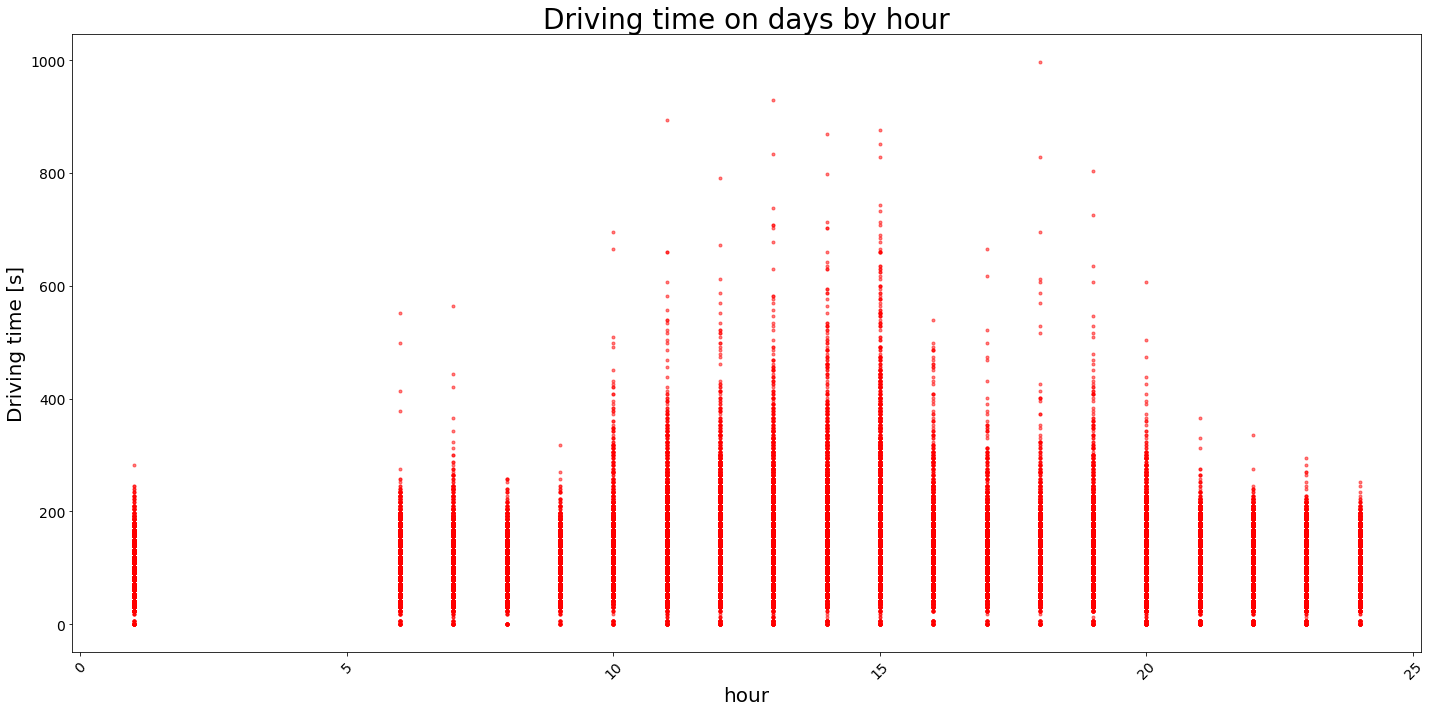

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(df_selected['hour'], df_selected['Driving_time_s'], '.', color='red', label='Original data', alpha=0.5)
plt.xlabel('hour', fontsize=20)
plt.ylabel(r'Driving time [s]', fontsize=20)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Driving time on days by hour', fontsize=28)

plt.tight_layout()

In [ ]:
for i in range(len(df_selected)):
  #print('1')
  if df_selected['hour'][i]<10:
    df_selected['timeofday'][i] = 0
  elif df_selected['hour'][i]<16:
    df_selected['timeofday'][i] = 1
  elif df_selected['hour'][i] < 18:
    df_selected['timeofday'][i] = 2
  elif df_selected['hour'][i] <21:
    df_selected['timeofday'][i] = 3
  else:
    df_selected['timeofday'][i] = 4

df_selected

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykerne

,index,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,hour,day,month,timeofday
0,99,2019-01-02 10:25:00,S Rübenkamp|AK Barmbek,0.0,180.0,186.0,2,11,2,1,1
1,100,2019-01-02 10:28:00,AK Barmbek|Hartzloh,0.0,60.0,90.0,2,11,2,1,1
2,101,2019-01-02 10:29:00,Hartzloh|Habichtsplatz,0.0,180.0,138.0,2,11,2,1,1
3,102,2019-01-02 10:32:00,Habichtsplatz|U Habichtstraße,0.0,60.0,78.0,2,11,2,1,1
4,103,2019-01-02 10:33:00,U Habichtstraße|Habichtstraße (Mitte),0.0,120.0,90.0,2,11,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
65558,67672,2019-12-14 18:21:00,U Habichtstraße|Habichtstraße (Mitte),0.0,120.0,42.0,5,19,14,12,3
65559,67673,2019-12-14 18:23:00,Habichtstraße (Mitte)|U Alter Teichweg,0.0,180.0,132.0,5,19,14,12,3
65560,67674,2019-12-14 18:26:00,U Alter Teichweg|U Straßburger Straße,0.0,120.0,408.0,5,19,14,12,3
65561,67675,2019-12-14 18:28:00,U Straßburger Straße|Wandsbeker Allee,0.0,60.0,102.0,5,19,14,12,3


In [ ]:
df_selected = df_selected.drop(['index','day','hour'], axis=1)
df_selected

,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,month,timeofday
0,2019-01-02 10:25:00,S Rübenkamp|AK Barmbek,0.0,180.0,186.0,2,1,1
1,2019-01-02 10:28:00,AK Barmbek|Hartzloh,0.0,60.0,90.0,2,1,1
2,2019-01-02 10:29:00,Hartzloh|Habichtsplatz,0.0,180.0,138.0,2,1,1
3,2019-01-02 10:32:00,Habichtsplatz|U Habichtstraße,0.0,60.0,78.0,2,1,1
4,2019-01-02 10:33:00,U Habichtstraße|Habichtstraße (Mitte),0.0,120.0,90.0,2,1,1
...,...,...,...,...,...,...,...,...
65558,2019-12-14 18:21:00,U Habichtstraße|Habichtstraße (Mitte),0.0,120.0,42.0,5,12,3
65559,2019-12-14 18:23:00,Habichtstraße (Mitte)|U Alter Teichweg,0.0,180.0,132.0,5,12,3
65560,2019-12-14 18:26:00,U Alter Teichweg|U Straßburger Straße,0.0,120.0,408.0,5,12,3
65561,2019-12-14 18:28:00,U Straßburger Straße|Wandsbeker Allee,0.0,60.0,102.0,5,12,3


In [ ]:
len(df_selected['Node A to Node B'].unique())

15

In [ ]:
df_selected.describe()

,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,month,timeofday
count,65563.000000,65563.000000,65563.000000,65563.000000,65563.000000,65563.00000
mean,-0.624758,115.597212,120.215609,3.677226,4.881046,1.99126
std,21.256677,58.405635,67.468726,1.980093,2.503362,1.47269
min,-499.000000,60.000000,0.000000,0.000000,1.000000,0.00000
25%,0.000000,60.000000,72.000000,2.000000,3.000000,1.00000
50%,0.000000,120.000000,108.000000,4.000000,5.000000,1.00000
75%,1.000000,120.000000,156.000000,5.000000,7.000000,4.00000
max,1.000000,480.000000,996.000000,6.000000,12.000000,4.00000


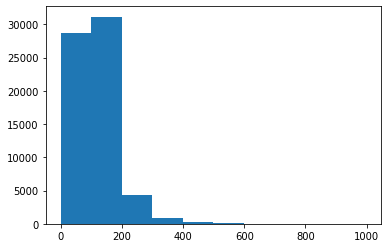

In [ ]:
plt.hist(df_selected['Driving_time_s'])
plt.show()

In [ ]:
data102 = df_selected.copy()

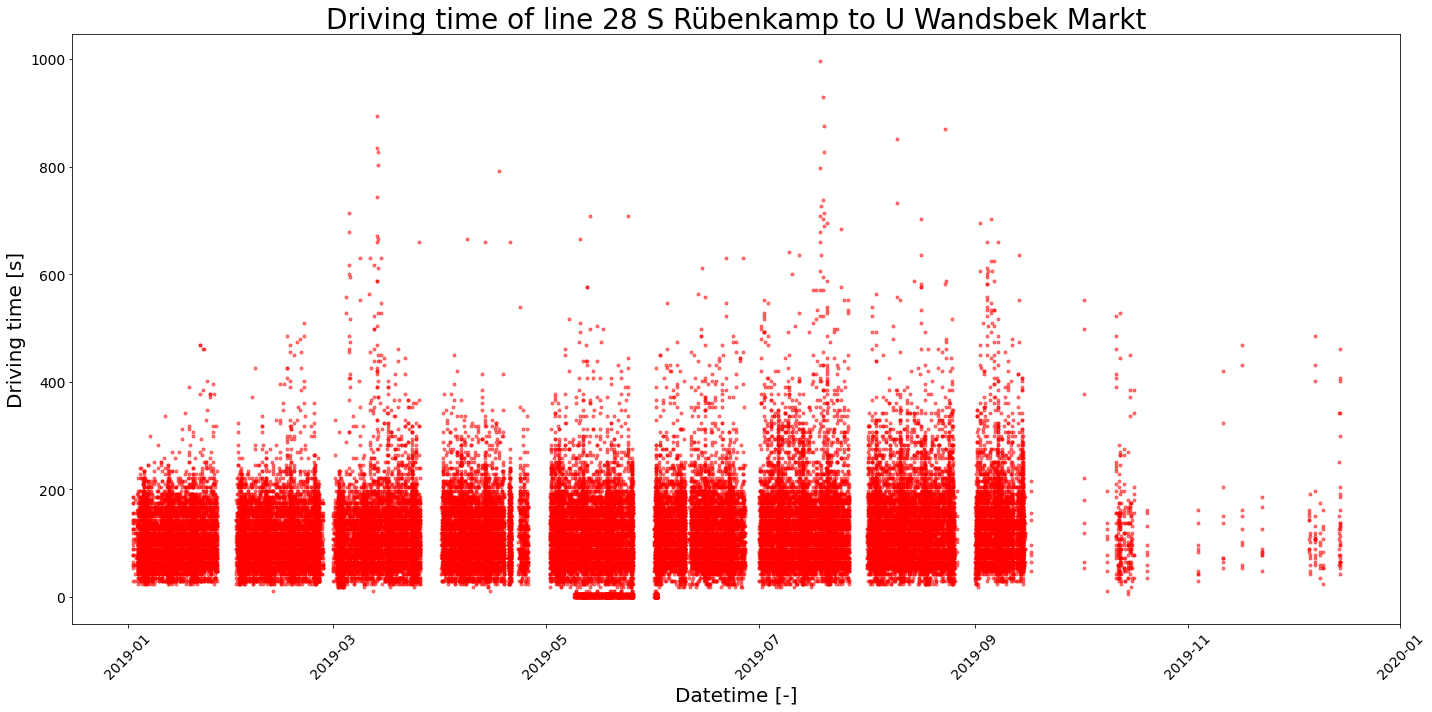

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(data102['Time'], data102['Driving_time_s'], '.', color='red', label='Original data', alpha=0.5)
plt.xlabel('Datetime [-]', fontsize=20)
plt.ylabel(r'Driving time [s]', fontsize=20)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Driving time of line 28 S Rübenkamp to U Wandsbek Markt', fontsize=28)

plt.tight_layout()

#plt.savefig('figures/available data.png', dpi=1200)

**Add two new columns for accumulate values**

In [ ]:
data102.loc[data102.Precipitation == -499 ]=0
data102 = data102.loc[data102['Node A to Node B'].isin(['U Straßburger Straße|Wandsbeker Allee',
'AK Barmbek|Hartzloh',
'U Habichtstraße|Habichtstraße (Mitte)',
'Habichtsplatz|U Habichtstraße',
'U Alter Teichweg|U Straßburger Straße',
'Wandsbeker Allee|U Wandsbek Markt',
'Hartzloh|Habichtsplatz',
'S Rübenkamp|AK Barmbek',
'Habichtstraße (Mitte)|U Alter Teichweg'])]

In [ ]:
data102 =data102.reset_index(drop=True)

In [ ]:
route_unique = (data102['Node A to Node B'].unique())
route_unique

array(['S Rübenkamp|AK Barmbek', 'AK Barmbek|Hartzloh',
       'Hartzloh|Habichtsplatz', 'Habichtsplatz|U Habichtstraße',
       'U Habichtstraße|Habichtstraße (Mitte)',
       'Habichtstraße (Mitte)|U Alter Teichweg',
       'U Alter Teichweg|U Straßburger Straße',
       'U Straßburger Straße|Wandsbeker Allee',
       'Wandsbeker Allee|U Wandsbek Markt'], dtype=object)

In [ ]:
#act_p = []
data102['Actual_trip_cum'] = 0
data102['Planned_trip_cum'] = 0
a = 0
b = 0

for i in range(len(data102)):
  #print(i)
  if data102['Node A to Node B'][i] == route_unique[0]: #the first path
    a = data102['Driving_time_s'][i]
    data102['Actual_trip_cum'][i] = a
    b = data102['Driving_time_s_p'][i]
    data102['Planned_trip_cum'][i] = b
  else:
    a += data102['Driving_time_s'][i] 
    data102['Actual_trip_cum'][i] = a
    b += data102['Driving_time_s_p'][i]
    data102['Planned_trip_cum'][i] = b
data102[:50]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/loc

,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,month,timeofday,Actual_trip_cum,Planned_trip_cum
0,2019-01-02 10:25:00,S Rübenkamp|AK Barmbek,0.0,180.0,186.0,2,1,1,186,180
1,2019-01-02 10:28:00,AK Barmbek|Hartzloh,0.0,60.0,90.0,2,1,1,276,240
2,2019-01-02 10:29:00,Hartzloh|Habichtsplatz,0.0,180.0,138.0,2,1,1,414,420
3,2019-01-02 10:32:00,Habichtsplatz|U Habichtstraße,0.0,60.0,78.0,2,1,1,492,480
4,2019-01-02 10:33:00,U Habichtstraße|Habichtstraße (Mitte),0.0,120.0,90.0,2,1,1,582,600
5,2019-01-02 10:35:00,Habichtstraße (Mitte)|U Alter Teichweg,0.0,180.0,126.0,2,1,1,708,780
6,2019-01-02 10:38:00,U Alter Teichweg|U Straßburger Straße,0.0,120.0,138.0,2,1,1,846,900
7,2019-01-02 10:40:00,U Straßburger Straße|Wandsbeker Allee,0.0,60.0,60.0,2,1,1,906,960
8,2019-01-02 10:41:00,Wandsbeker Allee|U Wandsbek Markt,0.0,180.0,126.0,2,1,1,1032,1140
9,2019-01-02 11:45:00,S Rübenkamp|AK Barmbek,0.0,180.0,174.0,2,1,1,174,180


Save to csv

In [ ]:
#data102.to_csv('ist_0420_data_processed102.csv')
#!cp ist_0420_data_processed102.csv "/content/drive/My Drive/Colab Notebooks/Thesis"
data102.to_csv('ist_01_12_19_data_processed102.csv')
!cp ist_01_12_19_data_processed102.csv "/content/drive/My Drive/Colab Notebooks/Thesis"



---



## Journey 201 ***U Wandsbek Markt to Lufthansa-Basis (Haupteingang)***

In [ ]:
df_selected = df_filter.loc[df_filter['S_Station'] == 'U Wandsbek Markt'].reset_index()
df_selected = df_selected.loc[df_selected['E_Station'] == 'Lufthansa-Basis (Haupteingang)'].reset_index()
df_selected = df_selected[['Ab_ZT_PLAN', 'TagRound', 'UML', 'Linie', 'Node A to Node B', 'Precipitation', 'Driving_time_s_p', 'Driving_time_s']]
#df_selected = df_selected.loc[df_selected['UML'] == 77082]
df_selected = df_selected.loc[df_selected['Linie']  == 28].reset_index()
df_selected = df_selected.loc[(df_selected['Driving_time_s']  <= 1000) & (df_selected['Driving_time_s']  >= 0)].reset_index()
df_selected = df_selected.drop(['Linie', 'TagRound', 'index', 'UML', 'level_0'], axis=1)
df_selected= df_selected.rename({'Ab_ZT_PLAN': 'Time'}, axis=1)
df_selected

,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s
0,2019-01-02 10:57:00,U Wandsbek Markt|Wandsbeker Allee,0.0,180.0,186.0
1,2019-01-02 11:00:00,Wandsbeker Allee|U Straßburger Straße,0.0,120.0,84.0
2,2019-01-02 11:02:00,U Straßburger Straße|U Alter Teichweg,0.0,120.0,102.0
3,2019-01-02 11:04:00,U Alter Teichweg|Habichtstraße (Mitte),0.0,180.0,162.0
4,2019-01-02 11:07:00,Habichtstraße (Mitte)|U Habichtstraße,0.0,60.0,36.0
...,...,...,...,...,...
162447,2019-12-23 07:33:00,Hindenburgstraße|Brabandstraße,1.0,120.0,90.0
162448,2019-12-23 07:35:00,Brabandstraße|Moltrechtweg,1.0,60.0,66.0
162449,2019-12-23 07:36:00,Moltrechtweg|Alsterkrugchaussee (Mitte),1.0,120.0,102.0
162450,2019-12-23 07:38:00,Alsterkrugchaussee (Mitte)|Obenhauptstraße,1.0,60.0,72.0


In [ ]:
import math
df_selected['dayofweek'] = df_selected['Time'].dt.dayofweek
df_selected['hour'] = (df_selected['Time'].dt.hour+1)
df_selected['day'] = df_selected['Time'].dt.day
df_selected['month'] = df_selected['Time'].dt.month
df_selected['timeofday'] = [0 for number in df_selected['Time']]
df_selected

,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,hour,day,month,timeofday
0,2019-01-02 10:57:00,U Wandsbek Markt|Wandsbeker Allee,0.0,180.0,186.0,2,11,2,1,0
1,2019-01-02 11:00:00,Wandsbeker Allee|U Straßburger Straße,0.0,120.0,84.0,2,12,2,1,0
2,2019-01-02 11:02:00,U Straßburger Straße|U Alter Teichweg,0.0,120.0,102.0,2,12,2,1,0
3,2019-01-02 11:04:00,U Alter Teichweg|Habichtstraße (Mitte),0.0,180.0,162.0,2,12,2,1,0
4,2019-01-02 11:07:00,Habichtstraße (Mitte)|U Habichtstraße,0.0,60.0,36.0,2,12,2,1,0
...,...,...,...,...,...,...,...,...,...,...
162447,2019-12-23 07:33:00,Hindenburgstraße|Brabandstraße,1.0,120.0,90.0,0,8,23,12,0
162448,2019-12-23 07:35:00,Brabandstraße|Moltrechtweg,1.0,60.0,66.0,0,8,23,12,0
162449,2019-12-23 07:36:00,Moltrechtweg|Alsterkrugchaussee (Mitte),1.0,120.0,102.0,0,8,23,12,0
162450,2019-12-23 07:38:00,Alsterkrugchaussee (Mitte)|Obenhauptstraße,1.0,60.0,72.0,0,8,23,12,0


Filter Holidays, 19 and 22

In [ ]:
#df_selected = df_selected[~df_selected['day'].isin([19,22])].reset_index()
df_selected = df_selected.loc[~(((df_selected['day'] == 1) & (df_selected['month'] ==  1))
                  |((df_selected['day'] == 19) & (df_selected['month'] == 4))
                  |((df_selected['day'] == 21) & (df_selected['month'] == 4))
                  |((df_selected['day'] == 22) & (df_selected['month'] == 4))
                  |((df_selected['day'] == 1) & (df_selected['month'] == 5))
                  |((df_selected['day'] == 30) & (df_selected['month'] == 5))
                  |((df_selected['day'] == 10) & (df_selected['month'] == 6))
                  |((df_selected['day'] == 3) & (df_selected['month'] == 10))
                  |((df_selected['day'] == 31) & (df_selected['month'] == 10))
                  |((df_selected['day'] == 25) & (df_selected['month'] == 12))
                  |((df_selected['day'] == 26) & (df_selected['month'] == 12))
                  ),:].reset_index()
df_selected[:50]

,index,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,hour,day,month,timeofday
0,0,2019-01-02 10:57:00,U Wandsbek Markt|Wandsbeker Allee,0.0,180.0,186.0,2,11,2,1,0
1,1,2019-01-02 11:00:00,Wandsbeker Allee|U Straßburger Straße,0.0,120.0,84.0,2,12,2,1,0
2,2,2019-01-02 11:02:00,U Straßburger Straße|U Alter Teichweg,0.0,120.0,102.0,2,12,2,1,0
3,3,2019-01-02 11:04:00,U Alter Teichweg|Habichtstraße (Mitte),0.0,180.0,162.0,2,12,2,1,0
4,4,2019-01-02 11:07:00,Habichtstraße (Mitte)|U Habichtstraße,0.0,60.0,36.0,2,12,2,1,0
5,5,2019-01-02 11:08:00,U Habichtstraße|Habichtsplatz,0.0,120.0,150.0,2,12,2,1,0
6,6,2019-01-02 11:10:00,Habichtsplatz|Neue Wöhr,0.0,120.0,144.0,2,12,2,1,0
7,7,2019-01-02 11:12:00,Neue Wöhr|Hartzloh,0.0,60.0,66.0,2,12,2,1,0
8,8,2019-01-02 11:13:00,Hartzloh|AK Barmbek,0.0,60.0,54.0,2,12,2,1,0
9,9,2019-01-02 11:14:00,AK Barmbek|Hebebrandstraße,0.0,120.0,132.0,2,12,2,1,0


Find driving time pattern of peak hours

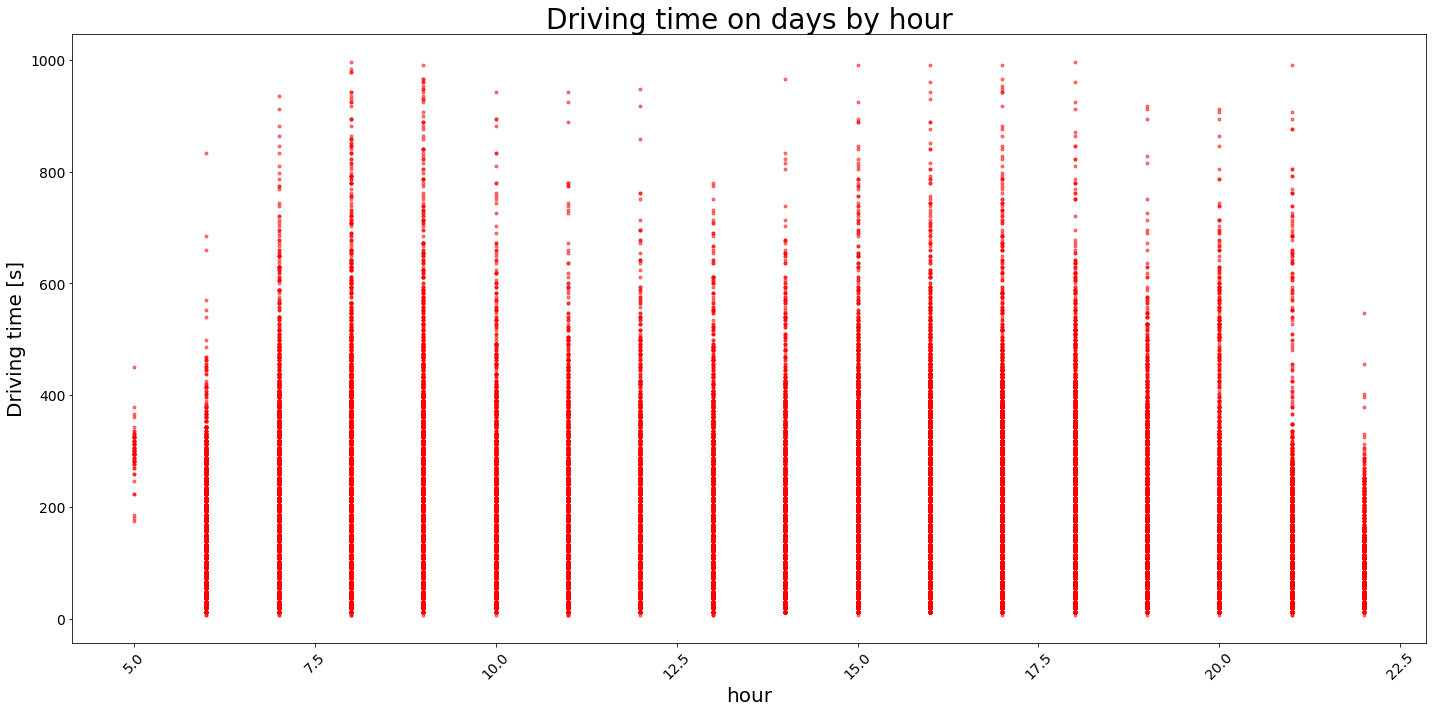

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(df_selected['hour'], df_selected['Driving_time_s'], '.', color='red', label='Original data', alpha=0.5)
plt.xlabel('hour', fontsize=20)
plt.ylabel(r'Driving time [s]', fontsize=20)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Driving time on days by hour', fontsize=28)

plt.tight_layout()

In [ ]:
for i in range(len(df_selected)):
  #print('1')
  if df_selected['hour'][i]<7:
    df_selected['timeofday'][i] = 0
  elif df_selected['hour'][i]<11:
    df_selected['timeofday'][i] = 1
  elif df_selected['hour'][i] < 15:
    df_selected['timeofday'][i] = 2
  elif df_selected['hour'][i] <19:
    df_selected['timeofday'][i] = 3
  elif df_selected['hour'][i] <22:
    df_selected['timeofday'][i] = 4
  else:
    df_selected['timeofday'][i] = 5

df_selected


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: Sett

,index,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,hour,day,month,timeofday
0,0,2019-01-02 10:57:00,U Wandsbek Markt|Wandsbeker Allee,0.0,180.0,186.0,2,11,2,1,2
1,1,2019-01-02 11:00:00,Wandsbeker Allee|U Straßburger Straße,0.0,120.0,84.0,2,12,2,1,2
2,2,2019-01-02 11:02:00,U Straßburger Straße|U Alter Teichweg,0.0,120.0,102.0,2,12,2,1,2
3,3,2019-01-02 11:04:00,U Alter Teichweg|Habichtstraße (Mitte),0.0,180.0,162.0,2,12,2,1,2
4,4,2019-01-02 11:07:00,Habichtstraße (Mitte)|U Habichtstraße,0.0,60.0,36.0,2,12,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
162447,162447,2019-12-23 07:33:00,Hindenburgstraße|Brabandstraße,1.0,120.0,90.0,0,8,23,12,1
162448,162448,2019-12-23 07:35:00,Brabandstraße|Moltrechtweg,1.0,60.0,66.0,0,8,23,12,1
162449,162449,2019-12-23 07:36:00,Moltrechtweg|Alsterkrugchaussee (Mitte),1.0,120.0,102.0,0,8,23,12,1
162450,162450,2019-12-23 07:38:00,Alsterkrugchaussee (Mitte)|Obenhauptstraße,1.0,60.0,72.0,0,8,23,12,1


In [ ]:
df_selected = df_selected.drop(['index','day','hour'], axis=1)
df_selected

,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,month,timeofday
0,2019-01-02 10:57:00,U Wandsbek Markt|Wandsbeker Allee,0.0,180.0,186.0,2,1,2
1,2019-01-02 11:00:00,Wandsbeker Allee|U Straßburger Straße,0.0,120.0,84.0,2,1,2
2,2019-01-02 11:02:00,U Straßburger Straße|U Alter Teichweg,0.0,120.0,102.0,2,1,2
3,2019-01-02 11:04:00,U Alter Teichweg|Habichtstraße (Mitte),0.0,180.0,162.0,2,1,2
4,2019-01-02 11:07:00,Habichtstraße (Mitte)|U Habichtstraße,0.0,60.0,36.0,2,1,2
...,...,...,...,...,...,...,...,...
162447,2019-12-23 07:33:00,Hindenburgstraße|Brabandstraße,1.0,120.0,90.0,0,12,1
162448,2019-12-23 07:35:00,Brabandstraße|Moltrechtweg,1.0,60.0,66.0,0,12,1
162449,2019-12-23 07:36:00,Moltrechtweg|Alsterkrugchaussee (Mitte),1.0,120.0,102.0,0,12,1
162450,2019-12-23 07:38:00,Alsterkrugchaussee (Mitte)|Obenhauptstraße,1.0,60.0,72.0,0,12,1


In [ ]:
len(df_selected['Node A to Node B'].unique())

58

In [ ]:
df_selected.describe()

,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,month,timeofday
count,162452.000000,162452.000000,162452.000000,162452.000000,162452.000000,162452.000000
mean,-0.113486,101.865413,113.753503,2.006150,6.581107,2.134384
std,14.179904,47.026426,94.500650,1.428886,3.140865,1.226916
min,-499.000000,60.000000,6.000000,0.000000,1.000000,0.000000
25%,0.000000,60.000000,60.000000,1.000000,4.000000,1.000000
50%,0.000000,120.000000,84.000000,2.000000,7.000000,2.000000
75%,1.000000,120.000000,132.000000,3.000000,9.000000,3.000000
max,1.000000,1500.000000,996.000000,4.000000,12.000000,5.000000


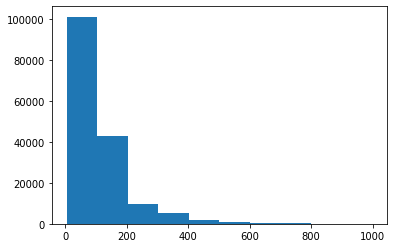

In [ ]:
plt.hist(df_selected['Driving_time_s'])
plt.show()

In [ ]:
data201 = df_selected.copy()

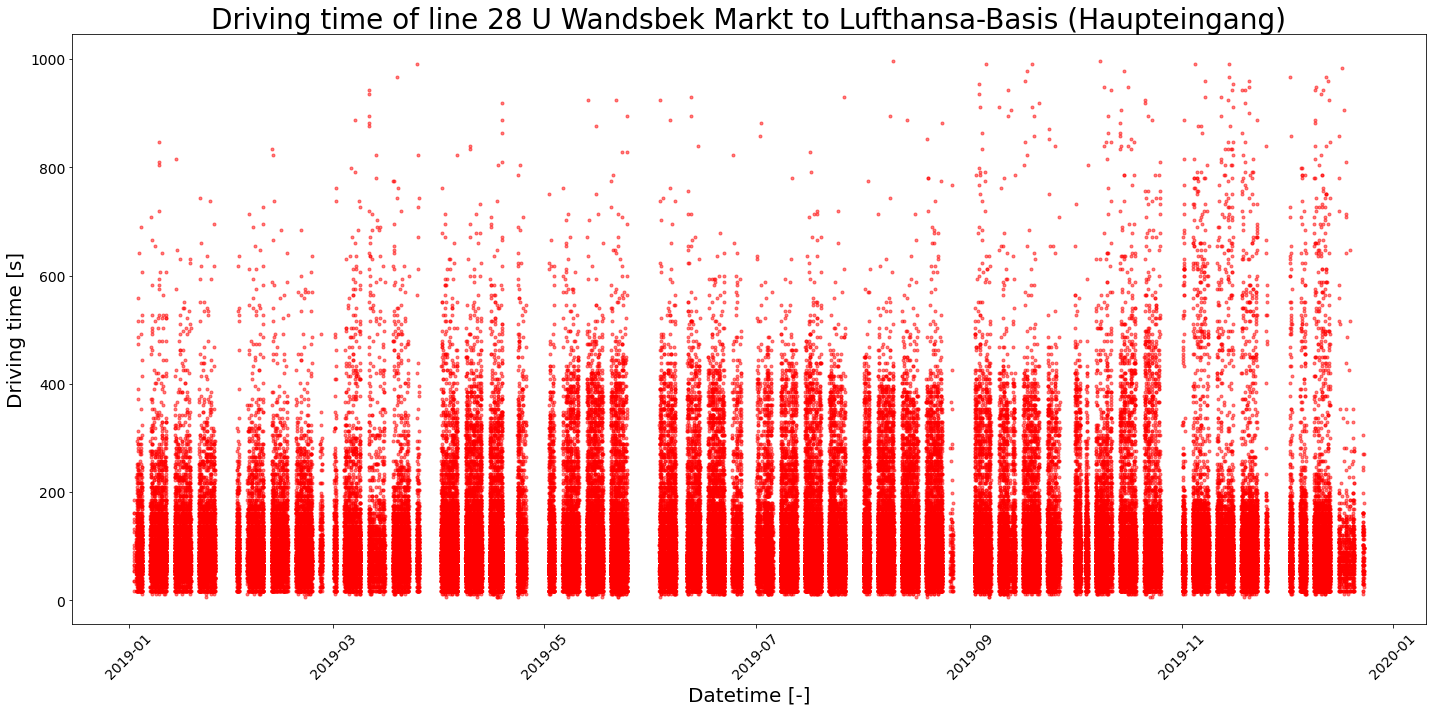

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(data201['Time'], data201['Driving_time_s'], '.', color='red', label='Original data', alpha=0.5)
plt.xlabel('Datetime [-]', fontsize=20)
plt.ylabel(r'Driving time [s]', fontsize=20)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Driving time of line 28 U Wandsbek Markt to Lufthansa-Basis (Haupteingang)', fontsize=28)

plt.tight_layout()

#plt.savefig('figures/available data.png', dpi=1200)

**Add two new columns for accumulate values**

In [ ]:
data201.loc[data201.Precipitation == -499 ]=0
data201 = data201.loc[data201['Node A to Node B'].isin(['Kapstadtring|Manilabrücke',
'U Alsterdorf|Hindenburgstraße',
'Habichtstraße (Mitte)|U Habichtstraße',
'Neue Wöhr|Hartzloh',
'Hartzloh|AK Barmbek',
'Brabandstraße|Moltrechtweg',
'Alsterkrugchaussee (Mitte)|Obenhauptstraße',
'Manilabrücke|Sydneystraße',
'Hebebrandstraße|S Rübenkamp',
'U Habichtstraße|Habichtsplatz',
'Moltrechtweg|Alsterkrugchaussee (Mitte)',
'Hindenburgstraße|Brabandstraße',
'S Rübenkamp|Kapstadtring',
'Wandsbeker Allee|U Straßburger Straße',
'Sydneystraße|U Alsterdorf',
'Habichtsplatz|Neue Wöhr',
'AK Barmbek|Hebebrandstraße',
'U Straßburger Straße|U Alter Teichweg',
'Obenhauptstraße|Lufthansa-Basis (Haupteingang)',
'U Alter Teichweg|Habichtstraße (Mitte)',
'U Wandsbek Markt|Wandsbeker Allee',
])]

In [ ]:
data201 =data201.reset_index(drop=True)

In [ ]:
route_unique = (data201['Node A to Node B'].unique())
route_unique

array(['U Wandsbek Markt|Wandsbeker Allee',
       'Wandsbeker Allee|U Straßburger Straße',
       'U Straßburger Straße|U Alter Teichweg',
       'U Alter Teichweg|Habichtstraße (Mitte)',
       'Habichtstraße (Mitte)|U Habichtstraße',
       'U Habichtstraße|Habichtsplatz', 'Habichtsplatz|Neue Wöhr',
       'Neue Wöhr|Hartzloh', 'Hartzloh|AK Barmbek',
       'AK Barmbek|Hebebrandstraße', 'Hebebrandstraße|S Rübenkamp',
       'S Rübenkamp|Kapstadtring', 'Kapstadtring|Manilabrücke',
       'Manilabrücke|Sydneystraße', 'Sydneystraße|U Alsterdorf',
       'U Alsterdorf|Hindenburgstraße', 'Hindenburgstraße|Brabandstraße',
       'Brabandstraße|Moltrechtweg',
       'Moltrechtweg|Alsterkrugchaussee (Mitte)',
       'Alsterkrugchaussee (Mitte)|Obenhauptstraße',
       'Obenhauptstraße|Lufthansa-Basis (Haupteingang)'], dtype=object)

In [ ]:
#act_p = []
data201['Actual_trip_cum'] = 0
data201['Planned_trip_cum'] = 0
a = 0
b = 0

for i in range(len(data201)):
  #print(i)
  if data201['Node A to Node B'][i] == route_unique[0]: #the first path
    a = data201['Driving_time_s'][i]
    data201['Actual_trip_cum'][i] = a
    b = data201['Driving_time_s_p'][i]
    data201['Planned_trip_cum'][i] = b
  else:
    a += data201['Driving_time_s'][i] 
    data201['Actual_trip_cum'][i] = a
    b += data201['Driving_time_s_p'][i]
    data201['Planned_trip_cum'][i] = b
data201[:50]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/loc

,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,month,timeofday,Actual_trip_cum,Planned_trip_cum
0,2019-01-02 10:57:00,U Wandsbek Markt|Wandsbeker Allee,0.0,180.0,186.0,2,1,2,186,180
1,2019-01-02 11:00:00,Wandsbeker Allee|U Straßburger Straße,0.0,120.0,84.0,2,1,2,270,300
2,2019-01-02 11:02:00,U Straßburger Straße|U Alter Teichweg,0.0,120.0,102.0,2,1,2,372,420
3,2019-01-02 11:04:00,U Alter Teichweg|Habichtstraße (Mitte),0.0,180.0,162.0,2,1,2,534,600
4,2019-01-02 11:07:00,Habichtstraße (Mitte)|U Habichtstraße,0.0,60.0,36.0,2,1,2,570,660
5,2019-01-02 11:08:00,U Habichtstraße|Habichtsplatz,0.0,120.0,150.0,2,1,2,720,780
6,2019-01-02 11:10:00,Habichtsplatz|Neue Wöhr,0.0,120.0,144.0,2,1,2,864,900
7,2019-01-02 11:12:00,Neue Wöhr|Hartzloh,0.0,60.0,66.0,2,1,2,930,960
8,2019-01-02 11:13:00,Hartzloh|AK Barmbek,0.0,60.0,54.0,2,1,2,984,1020
9,2019-01-02 11:14:00,AK Barmbek|Hebebrandstraße,0.0,120.0,132.0,2,1,2,1116,1140


In [ ]:
#data201.to_csv('ist_0420_data_processed201.csv')
#!cp ist_0420_data_processed201.csv "/content/drive/My Drive/Colab Notebooks/Thesis"
data201.to_csv('ist_01_12_19_data_processed201.csv')
!cp ist_01_12_19_data_processed201.csv "/content/drive/My Drive/Colab Notebooks/Thesis"



---



## Journey 202 ***Lufthansa-Basis (Haupteingang) to U Wandsbek Markt***

In [ ]:
df_selected = df_filter.loc[df_filter['S_Station'] == 'Lufthansa-Basis (Haupteingang)'].reset_index()
df_selected = df_selected.loc[df_selected['E_Station'] == 'U Wandsbek Markt'].reset_index()
df_selected = df_selected[['Ab_ZT_PLAN', 'TagRound', 'UML', 'Linie', 'Node A to Node B', 'Precipitation', 'Driving_time_s_p', 'Driving_time_s']]
#df_selected = df_selected.loc[df_selected['UML'] == 77082]
df_selected = df_selected.loc[df_selected['Linie']  == 28].reset_index()
df_selected = df_selected.loc[(df_selected['Driving_time_s']  <= 1000) & (df_selected['Driving_time_s']  >= 0)].reset_index()
df_selected = df_selected.drop(['Linie', 'TagRound', 'index', 'UML', 'level_0'], axis=1)
df_selected= df_selected.rename({'Ab_ZT_PLAN': 'Time'}, axis=1)
df_selected

,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s
0,2019-01-02 11:40:00,Lufthansa-Basis (Haupteingang)|Obenhauptstraße,0.0,120.0,186.0
1,2019-01-02 11:42:00,Obenhauptstraße|Alsterkrugchaussee (Mitte),0.0,60.0,30.0
2,2019-01-02 11:43:00,Alsterkrugchaussee (Mitte)|Moltrechtweg,0.0,120.0,60.0
3,2019-01-02 11:45:00,Moltrechtweg|Brabandstraße,0.0,60.0,96.0
4,2019-01-02 11:46:00,Brabandstraße|Hindenburgstraße,0.0,120.0,138.0
...,...,...,...,...,...
95717,2019-12-13 19:03:00,U Habichtstraße|Habichtstraße (Mitte),0.0,60.0,210.0
95718,2019-12-13 19:04:00,Habichtstraße (Mitte)|U Alter Teichweg,0.0,180.0,210.0
95719,2019-12-13 19:07:00,U Alter Teichweg|U Straßburger Straße,0.0,120.0,258.0
95720,2019-12-13 19:09:00,U Straßburger Straße|Wandsbeker Allee,0.0,60.0,96.0


In [ ]:
import math
df_selected['dayofweek'] = df_selected['Time'].dt.dayofweek
df_selected['hour'] = (df_selected['Time'].dt.hour+1)
df_selected['day'] = df_selected['Time'].dt.day
df_selected['month'] = df_selected['Time'].dt.month
df_selected['timeofday'] = [0 for number in df_selected['Time']]
df_selected

,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,hour,day,month,timeofday
0,2019-01-02 11:40:00,Lufthansa-Basis (Haupteingang)|Obenhauptstraße,0.0,120.0,186.0,2,12,2,1,0
1,2019-01-02 11:42:00,Obenhauptstraße|Alsterkrugchaussee (Mitte),0.0,60.0,30.0,2,12,2,1,0
2,2019-01-02 11:43:00,Alsterkrugchaussee (Mitte)|Moltrechtweg,0.0,120.0,60.0,2,12,2,1,0
3,2019-01-02 11:45:00,Moltrechtweg|Brabandstraße,0.0,60.0,96.0,2,12,2,1,0
4,2019-01-02 11:46:00,Brabandstraße|Hindenburgstraße,0.0,120.0,138.0,2,12,2,1,0
...,...,...,...,...,...,...,...,...,...,...
95717,2019-12-13 19:03:00,U Habichtstraße|Habichtstraße (Mitte),0.0,60.0,210.0,4,20,13,12,0
95718,2019-12-13 19:04:00,Habichtstraße (Mitte)|U Alter Teichweg,0.0,180.0,210.0,4,20,13,12,0
95719,2019-12-13 19:07:00,U Alter Teichweg|U Straßburger Straße,0.0,120.0,258.0,4,20,13,12,0
95720,2019-12-13 19:09:00,U Straßburger Straße|Wandsbeker Allee,0.0,60.0,96.0,4,20,13,12,0


Filter Holidays, 19 and 22

In [ ]:
#df_selected = df_selected[~df_selected['day'].isin([19,22])].reset_index()
df_selected = df_selected.loc[~(((df_selected['day'] == 1) & (df_selected['month'] ==  1))
                  |((df_selected['day'] == 19) & (df_selected['month'] == 4))
                  |((df_selected['day'] == 21) & (df_selected['month'] == 4))
                  |((df_selected['day'] == 22) & (df_selected['month'] == 4))
                  |((df_selected['day'] == 1) & (df_selected['month'] == 5))
                  |((df_selected['day'] == 30) & (df_selected['month'] == 5))
                  |((df_selected['day'] == 10) & (df_selected['month'] == 6))
                  |((df_selected['day'] == 3) & (df_selected['month'] == 10))
                  |((df_selected['day'] == 31) & (df_selected['month'] == 10))
                  |((df_selected['day'] == 25) & (df_selected['month'] == 12))
                  |((df_selected['day'] == 26) & (df_selected['month'] == 12))
                  ),:].reset_index()
df_selected[:50]

,index,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,hour,day,month,timeofday
0,0,2019-01-02 11:40:00,Lufthansa-Basis (Haupteingang)|Obenhauptstraße,0.0,120.0,186.0,2,12,2,1,0
1,1,2019-01-02 11:42:00,Obenhauptstraße|Alsterkrugchaussee (Mitte),0.0,60.0,30.0,2,12,2,1,0
2,2,2019-01-02 11:43:00,Alsterkrugchaussee (Mitte)|Moltrechtweg,0.0,120.0,60.0,2,12,2,1,0
3,3,2019-01-02 11:45:00,Moltrechtweg|Brabandstraße,0.0,60.0,96.0,2,12,2,1,0
4,4,2019-01-02 11:46:00,Brabandstraße|Hindenburgstraße,0.0,120.0,138.0,2,12,2,1,0
5,5,2019-01-02 11:48:00,Hindenburgstraße|U Alsterdorf,0.0,60.0,42.0,2,12,2,1,0
6,6,2019-01-02 11:49:00,U Alsterdorf|Sydneystraße,0.0,120.0,78.0,2,12,2,1,0
7,7,2019-01-02 11:51:00,Sydneystraße|Manilabrücke,0.0,60.0,90.0,2,12,2,1,0
8,8,2019-01-02 11:52:00,Manilabrücke|Kapstadtring,0.0,60.0,90.0,2,12,2,1,0
9,9,2019-01-02 11:53:00,Kapstadtring|S Rübenkamp,0.0,120.0,66.0,2,12,2,1,0


Find peak hours pattern

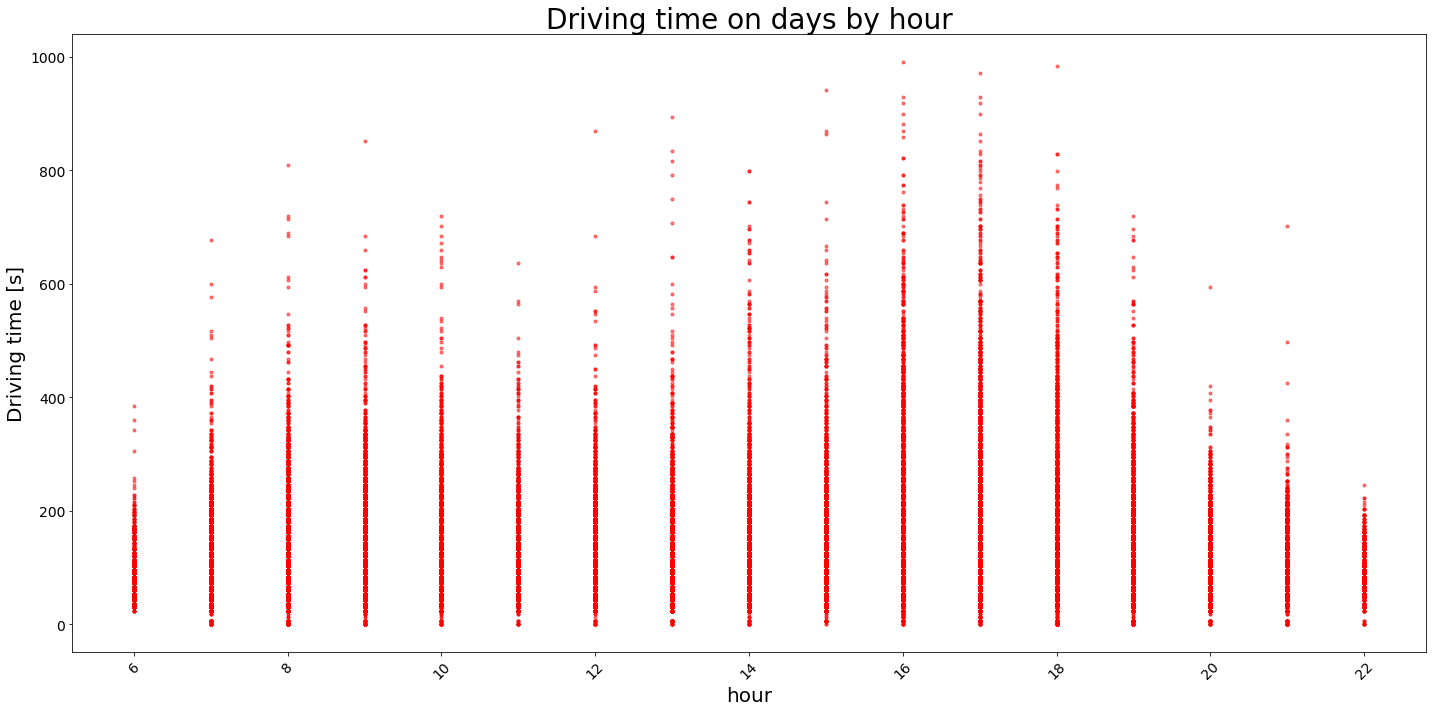

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(df_selected['hour'], df_selected['Driving_time_s'], '.', color='red', label='Original data', alpha=0.5)
plt.xlabel('hour', fontsize=20)
plt.ylabel(r'Driving time [s]', fontsize=20)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Driving time on days by hour', fontsize=28)

plt.tight_layout()

In [ ]:
for i in range(len(df_selected)):
  #print('1')
  if df_selected['hour'][i]<7:
    df_selected['timeofday'][i] = 0
  elif df_selected['hour'][i]<11:
    df_selected['timeofday'][i] = 1
  elif df_selected['hour'][i] < 13:
    df_selected['timeofday'][i] = 2
  elif df_selected['hour'][i] <19:
    df_selected['timeofday'][i] = 3
  elif df_selected['hour'][i] <20:
    df_selected['timeofday'][i] = 4
  else:
    df_selected['timeofday'][i] = 5

df_selected


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launc

,index,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,hour,day,month,timeofday
0,0,2019-01-02 11:40:00,Lufthansa-Basis (Haupteingang)|Obenhauptstraße,0.0,120.0,186.0,2,12,2,1,2
1,1,2019-01-02 11:42:00,Obenhauptstraße|Alsterkrugchaussee (Mitte),0.0,60.0,30.0,2,12,2,1,2
2,2,2019-01-02 11:43:00,Alsterkrugchaussee (Mitte)|Moltrechtweg,0.0,120.0,60.0,2,12,2,1,2
3,3,2019-01-02 11:45:00,Moltrechtweg|Brabandstraße,0.0,60.0,96.0,2,12,2,1,2
4,4,2019-01-02 11:46:00,Brabandstraße|Hindenburgstraße,0.0,120.0,138.0,2,12,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
95717,95717,2019-12-13 19:03:00,U Habichtstraße|Habichtstraße (Mitte),0.0,60.0,210.0,4,20,13,12,5
95718,95718,2019-12-13 19:04:00,Habichtstraße (Mitte)|U Alter Teichweg,0.0,180.0,210.0,4,20,13,12,5
95719,95719,2019-12-13 19:07:00,U Alter Teichweg|U Straßburger Straße,0.0,120.0,258.0,4,20,13,12,5
95720,95720,2019-12-13 19:09:00,U Straßburger Straße|Wandsbeker Allee,0.0,60.0,96.0,4,20,13,12,5


In [ ]:
df_selected = df_selected.drop(['index','day','hour'], axis=1)
df_selected

,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,month,timeofday
0,2019-01-02 11:40:00,Lufthansa-Basis (Haupteingang)|Obenhauptstraße,0.0,120.0,186.0,2,1,2
1,2019-01-02 11:42:00,Obenhauptstraße|Alsterkrugchaussee (Mitte),0.0,60.0,30.0,2,1,2
2,2019-01-02 11:43:00,Alsterkrugchaussee (Mitte)|Moltrechtweg,0.0,120.0,60.0,2,1,2
3,2019-01-02 11:45:00,Moltrechtweg|Brabandstraße,0.0,60.0,96.0,2,1,2
4,2019-01-02 11:46:00,Brabandstraße|Hindenburgstraße,0.0,120.0,138.0,2,1,2
...,...,...,...,...,...,...,...,...
95717,2019-12-13 19:03:00,U Habichtstraße|Habichtstraße (Mitte),0.0,60.0,210.0,4,12,5
95718,2019-12-13 19:04:00,Habichtstraße (Mitte)|U Alter Teichweg,0.0,180.0,210.0,4,12,5
95719,2019-12-13 19:07:00,U Alter Teichweg|U Straßburger Straße,0.0,120.0,258.0,4,12,5
95720,2019-12-13 19:09:00,U Straßburger Straße|Wandsbeker Allee,0.0,60.0,96.0,4,12,5


In [ ]:
len(df_selected['Node A to Node B'].unique())

49

In [ ]:
df_selected.describe()

,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,month,timeofday
count,95722.000000,95722.000000,95722.000000,95722.000000,95722.000000,95722.000000
mean,-0.179802,110.237981,121.266793,2.051159,5.344038,2.595882
std,14.964951,56.750673,80.233346,1.421054,2.373130,1.299534
min,-499.000000,60.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,60.000000,66.000000,1.000000,4.000000,1.000000
50%,0.000000,120.000000,102.000000,2.000000,5.000000,3.000000
75%,1.000000,120.000000,150.000000,3.000000,7.000000,3.000000
max,1.000000,1380.000000,990.000000,4.000000,12.000000,5.000000


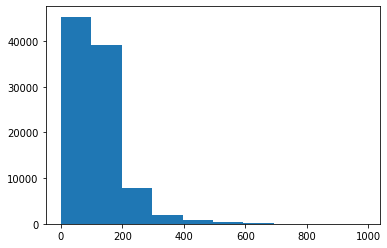

In [ ]:
plt.hist(df_selected['Driving_time_s'])
plt.show()

In [ ]:
data202 = df_selected.copy()

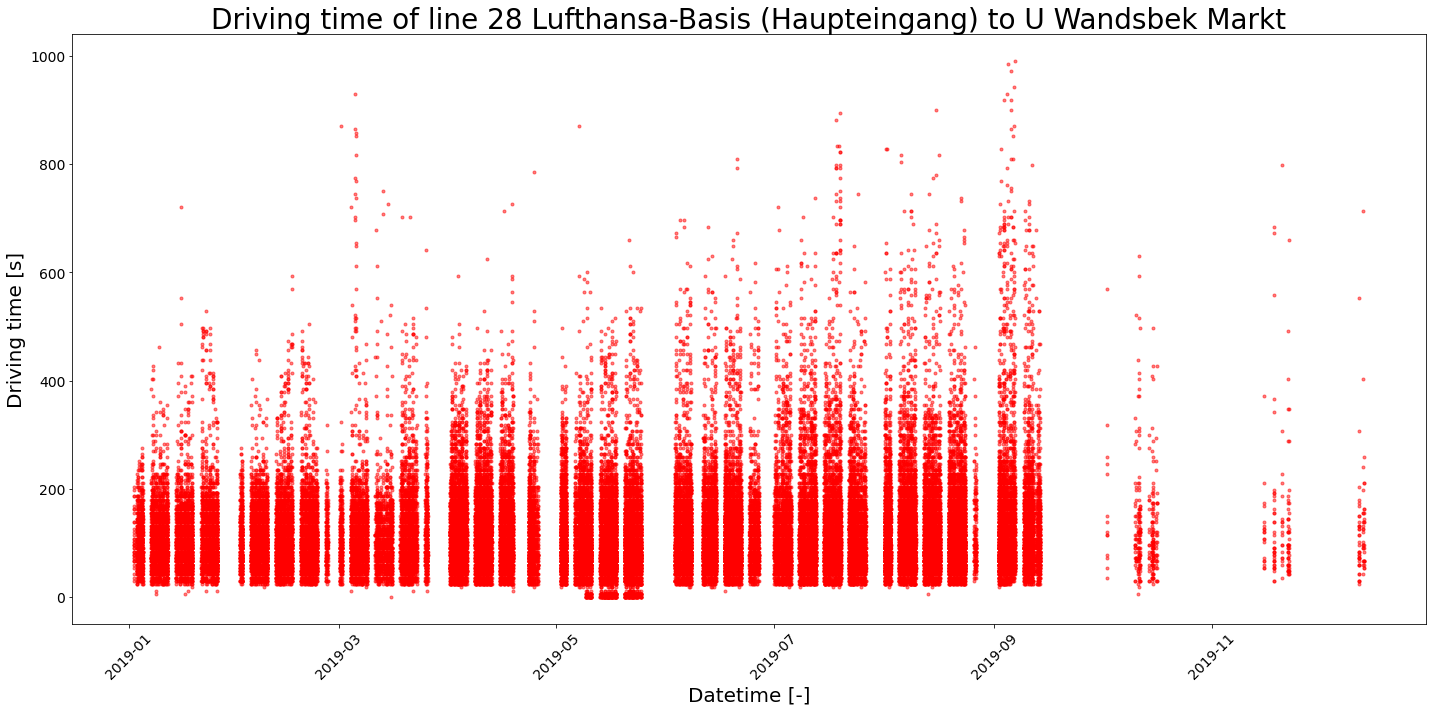

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(data202['Time'], data202['Driving_time_s'], '.', color='red', label='Original data', alpha=0.5)
plt.xlabel('Datetime [-]', fontsize=20)
plt.ylabel(r'Driving time [s]', fontsize=20)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Driving time of line 28 Lufthansa-Basis (Haupteingang) to U Wandsbek Markt', fontsize=28)

plt.tight_layout()

#plt.savefig('figures/available data.png', dpi=1200)

**Add two new columns for accumulate values**

In [ ]:
data202.loc[data202.Precipitation == -499 ]=0
data202 = data202.loc[data202['Node A to Node B'].isin(['Lufthansa-Basis (Haupteingang)|Obenhauptstraße',
        'Obenhauptstraße|Alsterkrugchaussee (Mitte)',
        'Alsterkrugchaussee (Mitte)|Moltrechtweg',
        'Moltrechtweg|Brabandstraße', 'Brabandstraße|Hindenburgstraße',
        'Hindenburgstraße|U Alsterdorf', 'U Alsterdorf|Sydneystraße',
        'Sydneystraße|Manilabrücke', 'Manilabrücke|Kapstadtring',
        'Kapstadtring|S Rübenkamp', 'S Rübenkamp|AK Barmbek', 'AK Barmbek|Hartzloh',
        'Hartzloh|Habichtsplatz', 'Habichtsplatz|U Habichtstraße',
        'U Habichtstraße|Habichtstraße (Mitte)',
        'Habichtstraße (Mitte)|U Alter Teichweg',
        'U Alter Teichweg|U Straßburger Straße',
        'U Straßburger Straße|Wandsbeker Allee',
        'Wandsbeker Allee|U Wandsbek Markt'])]

In [ ]:
data202 =data202.reset_index(drop=True)

In [ ]:
route_unique = (data202['Node A to Node B'].unique())
route_unique

array(['Lufthansa-Basis (Haupteingang)|Obenhauptstraße',
       'Obenhauptstraße|Alsterkrugchaussee (Mitte)',
       'Alsterkrugchaussee (Mitte)|Moltrechtweg',
       'Moltrechtweg|Brabandstraße', 'Brabandstraße|Hindenburgstraße',
       'Hindenburgstraße|U Alsterdorf', 'U Alsterdorf|Sydneystraße',
       'Sydneystraße|Manilabrücke', 'Manilabrücke|Kapstadtring',
       'Kapstadtring|S Rübenkamp', 'S Rübenkamp|AK Barmbek',
       'AK Barmbek|Hartzloh', 'Hartzloh|Habichtsplatz',
       'Habichtsplatz|U Habichtstraße',
       'U Habichtstraße|Habichtstraße (Mitte)',
       'Habichtstraße (Mitte)|U Alter Teichweg',
       'U Alter Teichweg|U Straßburger Straße',
       'U Straßburger Straße|Wandsbeker Allee',
       'Wandsbeker Allee|U Wandsbek Markt'], dtype=object)

In [ ]:
#act_p = []
data202['Actual_trip_cum'] = 0
data202['Planned_trip_cum'] = 0
a = 0
b = 0

for i in range(len(data202)):
  #print(i)
  if data202['Node A to Node B'][i] == route_unique[0]: #the first path
    a = data202['Driving_time_s'][i]
    data202['Actual_trip_cum'][i] = a
    b = data202['Driving_time_s_p'][i]
    data202['Planned_trip_cum'][i] = b
  else:
    a += data202['Driving_time_s'][i] 
    data202['Actual_trip_cum'][i] = a
    b += data202['Driving_time_s_p'][i]
    data202['Planned_trip_cum'][i] = b
data202[:50]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/loc

,Time,Node A to Node B,Precipitation,Driving_time_s_p,Driving_time_s,dayofweek,month,timeofday,Actual_trip_cum,Planned_trip_cum
0,2019-01-02 11:40:00,Lufthansa-Basis (Haupteingang)|Obenhauptstraße,0.0,120.0,186.0,2,1,2,186,120
1,2019-01-02 11:42:00,Obenhauptstraße|Alsterkrugchaussee (Mitte),0.0,60.0,30.0,2,1,2,216,180
2,2019-01-02 11:43:00,Alsterkrugchaussee (Mitte)|Moltrechtweg,0.0,120.0,60.0,2,1,2,276,300
3,2019-01-02 11:45:00,Moltrechtweg|Brabandstraße,0.0,60.0,96.0,2,1,2,372,360
4,2019-01-02 11:46:00,Brabandstraße|Hindenburgstraße,0.0,120.0,138.0,2,1,2,510,480
5,2019-01-02 11:48:00,Hindenburgstraße|U Alsterdorf,0.0,60.0,42.0,2,1,2,552,540
6,2019-01-02 11:49:00,U Alsterdorf|Sydneystraße,0.0,120.0,78.0,2,1,2,630,660
7,2019-01-02 11:51:00,Sydneystraße|Manilabrücke,0.0,60.0,90.0,2,1,2,720,720
8,2019-01-02 11:52:00,Manilabrücke|Kapstadtring,0.0,60.0,90.0,2,1,2,810,780
9,2019-01-02 11:53:00,Kapstadtring|S Rübenkamp,0.0,120.0,66.0,2,1,2,876,900


In [ ]:
#data202.to_csv('ist_0420_data_processed202.csv')
#!cp ist_0420_data_processed202.csv "/content/drive/My Drive/Colab Notebooks/Thesis"
data202.to_csv('ist_01_12_19_data_processed202.csv')
!cp ist_01_12_19_data_processed202.csv "/content/drive/My Drive/Colab Notebooks/Thesis"